# Bank Marketing Case-Study

#### Steps Involved:
1. Problem defination
2. Data Cleaning
3. Exploratory data analysis
4. Predictive Model

#### Step 1: Problem Defination

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.



#### Objective: The objective is to predict if the client will subscribe (yes/no) to a term deposit, by building classification model using Machine Learning algorithms.

#### Varaible Description:

1. age-Age of the clients (numeric)
2. job-the job type of the clients (categorical)
3. marital-Marital status of clients (categorical)
4. education-Education level of clients (categorical)
5. default-has credit in default? (Categorical: "yes”, “no")
6. balance-average yearly balance, in euros (numeric)
7. housing-has housing loan? (Categorical: "yes”, “no")
8. loan-has personal loan? (Categorical: "yes”, “no")
9. contact-contact communication type (categorical: "unknown", "telephone", "cellular")
10. day-last contact day of the month (numeric)
11. month-last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration-last contact duration, in seconds (numeric)
13. campaign-number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays-number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous-number of contacts performed before this campaign and for this client (numeric)
16. poutcome-outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
17. deposit-has the client subscribed a term deposit? (Categorical: "yes", "no")

Importing the necessary packages

In [1]:
# to work with the dataframes
import pandas as pd
# to work with N-array
import numpy as np
# to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# to partition the data into training and validation dataset
from  sklearn.model_selection import train_test_split

# to scale the independent variables
from sklearn.preprocessing import StandardScaler

# to encode the target / label variables
from sklearn.preprocessing import LabelEncoder

# importng Logistic Reegression model
from sklearn.linear_model import LogisticRegression

# importin performance matrices
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score)

In [3]:
# importing KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

In [4]:
##for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# importing dataset &  tree package from sklearn for Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

# importing RandomForest Classifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Importing the library for PCA
from sklearn.decomposition import PCA

In [7]:
# Hyperparameter Tuning
from sklearn.model_selection import(GridSearchCV,RandomizedSearchCV)
#For the tuning function for hyperparameter tuning
from sklearn.metrics import make_scorer

In [8]:
# Classification SVM Model-SVC is used for the Kernals Poly & RBF
from sklearn.svm import SVC

#### Step 2: Data Cleaning

In [9]:
bank_data=pd.read_csv("D:/IIT M BTCUBE/Advance Course/Assignment/ASS 9 Classification/bank_marketing.csv",index_col=0)

In [10]:
# creating a deep copy
bank=bank_data.copy(deep=True)

In [11]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 784.8+ KB


data schema infered correctly while reading

In [13]:
bank.shape

(5581, 17)

In [14]:
bank_object_col=bank.select_dtypes(include=[object]).columns[:-1]
bank_object_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [15]:
for col in bank_object_col:
    print(f"Columns:{col}'='{bank[col].unique()}\n")
    print(f"{bank[col].value_counts()}\n")

Columns:job'='['services' 'technician' 'management' 'unemployed' 'retired' 'blue-collar'
 'housemaid' 'admin.' 'entrepreneur' 'student' 'self-employed' 'unknown']

management       1318
blue-collar       975
technician        887
admin.            661
services          452
retired           397
self-employed     206
student           182
unemployed        170
entrepreneur      160
housemaid         143
unknown            30
Name: job, dtype: int64

Columns:marital'='['married' 'single' 'divorced']

married     3134
single      1816
divorced     631
Name: marital, dtype: int64

Columns:education'='['unknown' 'secondary' 'tertiary' 'primary']

secondary    2719
tertiary     1871
primary       746
unknown       245
Name: education, dtype: int64

Columns:default'='['no' 'yes']

no     5497
yes      84
Name: default, dtype: int64

Columns:housing'='['yes' 'no']

no     2928
yes    2653
Name: housing, dtype: int64

Columns:loan'='['no' 'yes']

no     4863
yes     718
Name: loan, dtype: int64

"unknown " available in 'job', 'education','contact' & 'poutcome'

In [16]:
bank[bank[:]['job']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
220,46,unknown,married,unknown,no,2911,no,no,telephone,7,jul,41,9,-1,0,unknown,no
512,34,unknown,single,secondary,no,859,no,no,cellular,28,jan,829,1,-1,0,unknown,yes
547,42,unknown,single,unknown,yes,61,no,no,unknown,20,jun,115,1,-1,0,unknown,no
1180,43,unknown,married,primary,no,0,yes,no,cellular,9,jul,132,1,-1,0,unknown,no
1262,41,unknown,single,unknown,no,942,no,no,cellular,27,oct,143,1,188,1,success,yes
1909,51,unknown,married,unknown,no,2642,no,no,cellular,29,jul,52,6,-1,0,unknown,no
1986,54,unknown,married,secondary,no,2206,no,no,cellular,12,nov,104,1,99,2,other,yes
2006,45,unknown,married,unknown,no,2834,no,no,cellular,4,aug,112,1,-1,0,unknown,no
2060,45,unknown,divorced,unknown,no,0,no,no,cellular,21,apr,278,3,-1,0,unknown,yes
2253,27,unknown,single,unknown,no,326,no,no,cellular,22,feb,326,1,-1,0,unknown,yes


In [17]:
bank[bank[:]['education']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
25,32,technician,single,unknown,no,491,no,no,cellular,8,oct,251,2,91,7,success,yes
44,81,retired,divorced,unknown,no,0,no,no,telephone,16,oct,128,1,-1,0,unknown,no
94,34,blue-collar,married,unknown,no,391,yes,yes,unknown,23,may,34,2,-1,0,unknown,no
117,51,admin.,married,unknown,no,-1137,yes,yes,telephone,11,may,567,3,325,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,29,management,single,unknown,no,560,no,no,cellular,5,apr,459,1,307,1,failure,yes
5544,52,services,married,unknown,no,482,yes,yes,cellular,28,jul,83,7,-1,0,unknown,no
5548,44,self-employed,married,unknown,no,163,yes,no,cellular,12,aug,44,1,100,3,success,no
5562,38,student,single,unknown,no,64,no,no,cellular,6,aug,789,1,-1,0,unknown,no


In [18]:
bank[bank[:]['contact']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
14,38,blue-collar,divorced,secondary,no,2998,yes,no,unknown,11,jun,91,1,-1,0,unknown,no
19,35,blue-collar,married,primary,no,994,yes,no,unknown,23,may,1349,8,-1,0,unknown,yes
21,38,blue-collar,married,primary,no,668,no,no,unknown,8,may,238,1,-1,0,unknown,no
31,28,management,married,secondary,no,292,yes,no,unknown,28,may,507,1,-1,0,unknown,yes
33,38,services,married,primary,no,175,no,no,unknown,17,jun,132,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,37,services,single,secondary,no,278,yes,no,unknown,3,jun,1045,3,-1,0,unknown,yes
5572,45,unknown,married,primary,no,44,no,no,unknown,11,jun,81,1,-1,0,unknown,no
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no


In [19]:
bank.duplicated().sum()

0

No Duplicate values

In [20]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No Null value

##### Outlier Detection

<AxesSubplot:xlabel='deposit', ylabel='age'>

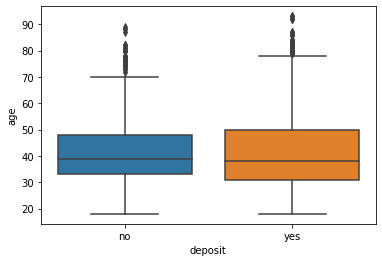

In [21]:
# detecting outliers for variable age   
sns.boxplot(x='deposit',y='age',data=bank)

<AxesSubplot:ylabel='balance'>

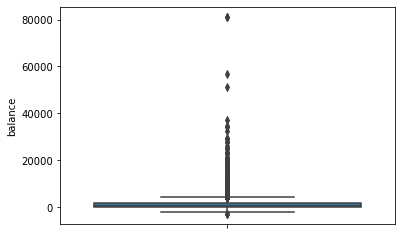

In [22]:
# Variable balance
sns.boxplot(y=bank['balance'])

<AxesSubplot:xlabel='deposit', ylabel='balance'>

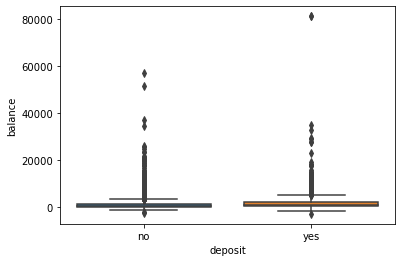

In [23]:
sns.boxplot(x='deposit',y='balance',data=bank)

Heavily Right Skewed 

<AxesSubplot:ylabel='duration'>

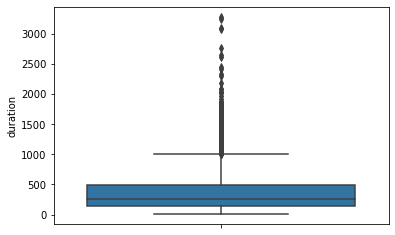

In [24]:
# Variable duration 
sns.boxplot(y=bank['duration'])

<AxesSubplot:xlabel='deposit', ylabel='duration'>

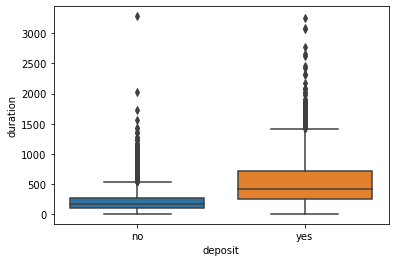

In [25]:
sns.boxplot(x='deposit',y='duration',data=bank)

Right Skewed distribution

<AxesSubplot:ylabel='campaign'>

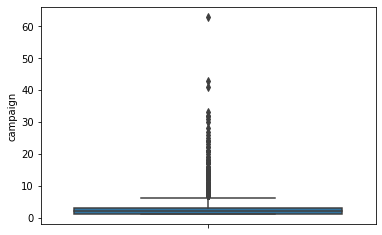

In [26]:
# Variable campaign
sns.boxplot(y=bank['campaign'])

<AxesSubplot:xlabel='deposit', ylabel='campaign'>

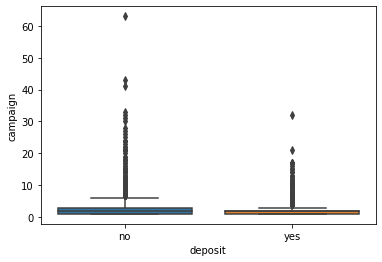

In [27]:
sns.boxplot(x='deposit',y='campaign',data=bank)

Heavily Right Skewed distribution

<AxesSubplot:ylabel='pdays'>

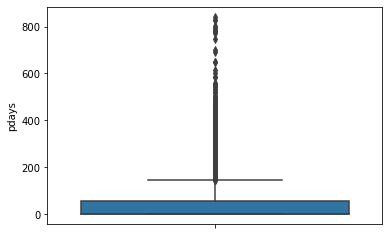

In [28]:
# Variable pdays
sns.boxplot(y=bank['pdays'])

<AxesSubplot:xlabel='deposit', ylabel='pdays'>

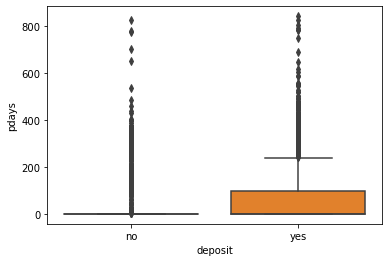

In [29]:
sns.boxplot(x='deposit',y='pdays',data=bank)

Heavily Right Skewed distribution

<AxesSubplot:ylabel='previous'>

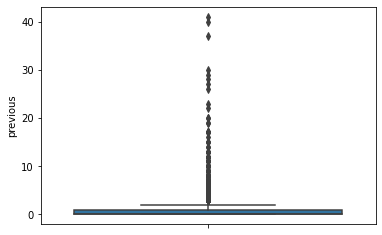

In [30]:
# Variable previous
sns.boxplot(y=bank['previous'])

<AxesSubplot:xlabel='deposit', ylabel='previous'>

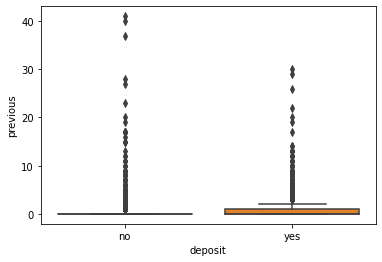

In [31]:
sns.boxplot(x='deposit',y='previous',data=bank)

Heavily Right Skewed distribution

Not Removing the outliers as there will be considerable loss of data as the data set is small.

###### Observation:-
 - No Duplicate Records found
 - No Missing values in the Records found
 - Not Removing the Outliers as this can cause loss of data as the DataSet is small
 - "unknown " available in 'job', 'education','contact' & 'poutcome'- not dropping in order not to loose information

In [32]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000
mean,41.169683,1514.736786,15.693603,368.175954,2.507436,52.534313,0.849669
std,11.926044,3266.534626,8.461086,344.131053,2.770717,110.754995,2.311684
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,110.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,49.000000,1747.000000,22.000000,485.000000,3.000000,57.000000,1.000000
max,93.000000,81204.000000,31.000000,3284.000000,63.000000,842.000000,41.000000


###### Observation:-

age	
1. The people contact for term deposit are in age group from 18 yrs to 93yrs
2. 75% of people contacted for deposit are below 50yrs of age
3. mean>median-Slightly right skewed with outliers
4. Avg age of the people approached is 41 yrs

balance	
1. The minimun value is -3508 which implies that people contacted had negative balance in account means they had to pay back to the bank.
2. Highest balance in the account available is 81000 euros though 75% of the people contacted had balance less the 1750 euros
3.  mean>median-right skewed with outliers

day
1. People were contacted between 1 to 31st of the month. 75% people were contacted by 22 of the month.

duration
1. The minimum duration of call lasted for 3sec and the maximum went upto 3284sec. 
2. 75% of the calles were less than 485sec.
3. mean>median-right skewed with outliers

campaign
1. 75% of the people contacted only once 
2. 50% were contacted twice.
3. 25% were contacted thrice.
4. Maximum contacts made to a customer is 63 times.
5. Outliers are present

pdays
1. It shows that more than 50% of the people are contacted for the first time by the bank. They have not been contacted during the previous campaign.
2. However, 25% were contacted after more than 57 days
3. Maximum of 842 days passed after a client was last contacted from a previous campaign.
4. mean>median-right skewed with outliers

previous
1. More than 50% clients are not contacted before this campaign. It matches our earlier variable
2. 25% are contacted once before this campaign & 25% are contacted more than once.
2. Maximum 41 times a client contacted before this campaign. 

#### Step 3: Exploratory Data Analysis & Visualisation

##### Correlation

In [33]:
bank_numeric=bank.select_dtypes(exclude='object')

In [34]:
corr=bank_numeric.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.128465,0.009250,-0.008453,-0.018844,-0.002383,0.022026
balance,0.128465,1.000000,0.005989,0.022242,-0.015866,0.030656,0.044003
day,0.009250,0.005989,1.000000,-0.013211,0.133264,-0.073403,-0.048452
duration,-0.008453,0.022242,-0.013211,1.000000,-0.048190,-0.034635,-0.031562
campaign,-0.018844,-0.015866,0.133264,-0.048190,1.000000,-0.098066,-0.041082
pdays,-0.002383,0.030656,-0.073403,-0.034635,-0.098066,1.000000,0.492715
previous,0.022026,0.044003,-0.048452,-0.031562,-0.041082,0.492715,1.000000


###### Observation:-
No correlation between the independent variables.

<AxesSubplot:xlabel='deposit', ylabel='count'>

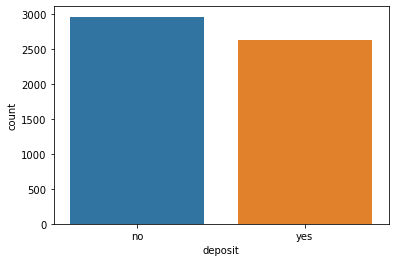

In [35]:
# Frequency Distribution of Deposit
sns.countplot(x='deposit',data=bank)

In [36]:
deposit_yes=len(bank[bank['deposit']=='yes'])
deposit_no=len(bank[bank['deposit']=='no'])
perc_deposit_yes=(deposit_yes/len(bank['deposit']))*100
perc_deposit_no=(deposit_no/len(bank['deposit']))*100

In [37]:
print(f" Percentage of Subscription={round(perc_deposit_yes)}%")
print(f" Percentage of Non Subscription={round(perc_deposit_no)}%")

 Percentage of Subscription=47%
 Percentage of Non Subscription=53%


###### Observation:-
Minority Class is around 47%, which is more than 40%, so the dataset is a Balanced dataset

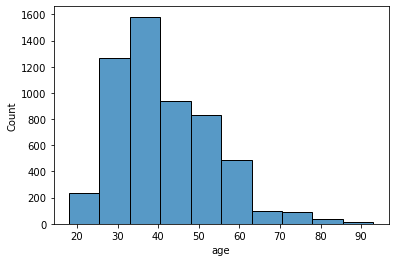

In [38]:
sns.histplot(bank['age'],bins=10, kde=False)
plt.show()

Maximum people(around 1600) have been aproached are of the age group 30-40

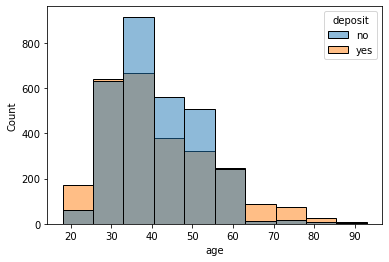

In [39]:
sns.histplot(x='age',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Customers of all age group have deposit 
2. Most Cusutomers are in Age group 20yrs-65yrs are having more deposit.
3. Most Customers above 60yrs make deposit.
4. Most Cuatomers below 25yrs make deposit

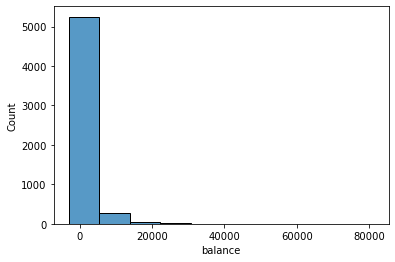

In [40]:
sns.histplot(bank['balance'],bins=10, kde=False)
plt.show()

Maximun people have either the negative balance or not more than 5000 euros.

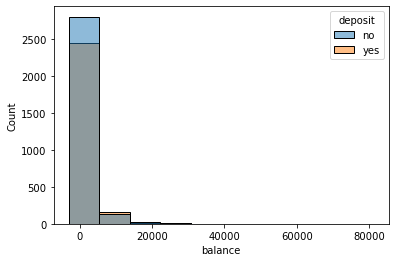

In [41]:
sns.histplot(x='balance',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Customers with more balance do not prefer deposit.

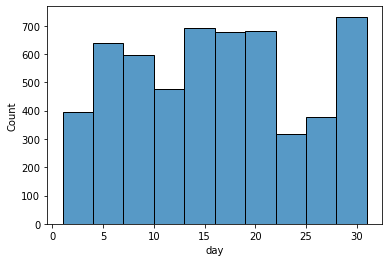

In [39]:
sns.histplot(bank['day'],bins=10, kde=False)
plt.show()

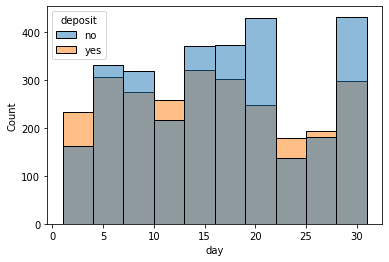

In [40]:
sns.histplot(x='day',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1.People invest in deposit more in the starting of the month i.e. before 15th of the month

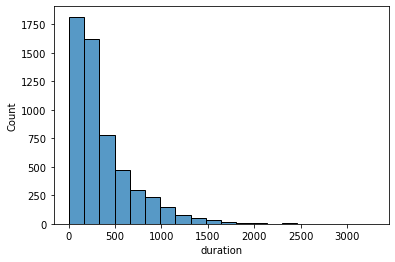

In [41]:
sns.histplot(bank['duration'],bins=20, kde=False)
plt.show()

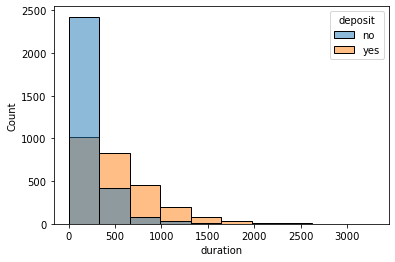

In [42]:
sns.histplot(x='duration',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Customers who attended calls for more duration prefer more deposit.

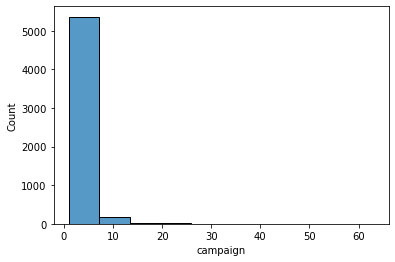

In [43]:
sns.histplot(bank['campaign'],bins=10, kde=False)
plt.show()

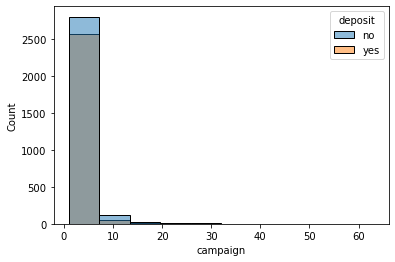

In [50]:
sns.histplot(x='campaign',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Customers if contacted more number of times the customer prefer deposit

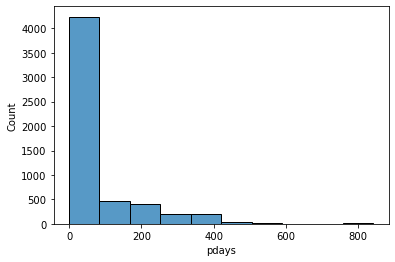

In [45]:
sns.histplot(bank['pdays'],bins=10, kde=False)
plt.show()

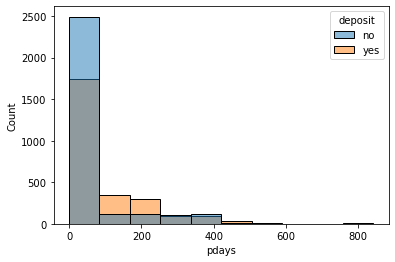

In [46]:
sns.histplot(x='pdays',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Number of days that passed by after the client was last contacted from a previous campaign prefer less deposit.

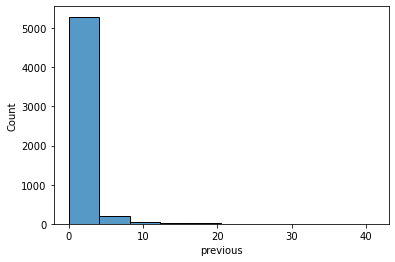

In [47]:
sns.histplot(bank['previous'],bins=10, kde=False)
plt.show()

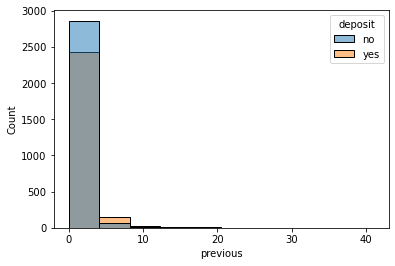

In [48]:
sns.histplot(x='previous',data=bank,hue='deposit',bins=10, kde=False)
plt.show()

1. Not many previously contacted Customers prefer deposit more.

In [49]:
pd.crosstab(index=bank['job'], columns='count',normalize=True)

col_0,count
job,
admin.,0.118438
blue-collar,0.174700
entrepreneur,0.028669
housemaid,0.025623
management,0.236158
retired,0.071134
self-employed,0.036911
services,0.080989
student,0.032611


In [50]:
pd.crosstab(index=bank['job'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
job,,
admin.,0.537065,0.462935
blue-collar,0.645128,0.354872
entrepreneur,0.656250,0.343750
housemaid,0.580420,0.419580
management,0.492413,0.507587
retired,0.357683,0.642317
self-employed,0.500000,0.500000
services,0.581858,0.418142
student,0.291209,0.708791


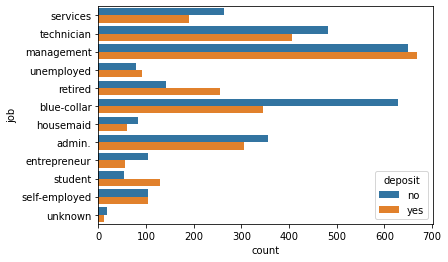

In [51]:
sns.countplot(y='job', hue='deposit',data=bank)
plt.show()

1. Customers from Management,retired, students and unemployed jobtype prefer deposit.
2. Customers with blue-collar, technician, service,entrpreneur and admin jobs deposit considerably less.

In [52]:
pd.crosstab(index=bank['marital'], columns='count',normalize=True)

col_0,count
marital,
divorced,0.113062
married,0.561548
single,0.325390


In [53]:
pd.crosstab(index=bank['marital'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
marital,,
divorced,0.546751,0.453249
married,0.576579,0.423421
single,0.444383,0.555617
All,0.530192,0.469808


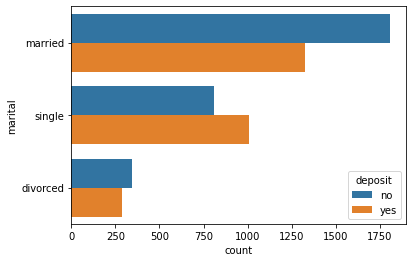

In [54]:
sns.countplot(y='marital', hue='deposit',data=bank)
plt.show()

1. People with married status prefer less deposit.
2. People with Single Status prefer more deposit.

In [55]:
pd.crosstab(index=bank['education'], columns='count',normalize=True)

col_0,count
education,
primary,0.133668
secondary,0.487189
tertiary,0.335245
unknown,0.043899


In [56]:
pd.crosstab(index=bank['education'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
education,,
primary,0.595174,0.404826
secondary,0.564546,0.435454
tertiary,0.455371,0.544629
unknown,0.522449,0.477551
All,0.530192,0.469808


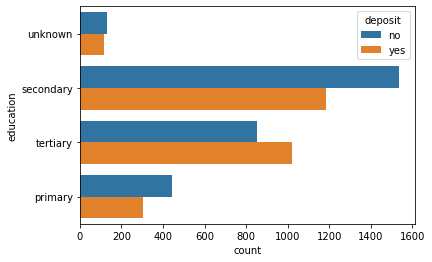

In [57]:
sns.countplot(y='education', hue='deposit',data=bank)
plt.show()

1. Tertiary educated customer prefer more to deposit.
2. Customers with other education type prefer to mak less deposit.

In [58]:
pd.crosstab(index=bank['default'], columns='count',normalize=True)

col_0,count
default,
no,0.984949
yes,0.015051


In [59]:
pd.crosstab(index=bank['default'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
default,,
no,0.526651,0.473349
yes,0.761905,0.238095
All,0.530192,0.469808


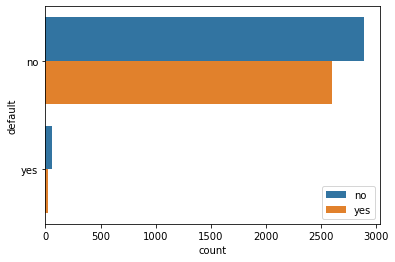

In [60]:
sns.countplot(y='default', hue='deposit',data=bank)
plt.legend(loc="lower right")
plt.show()

1. Customers with default or no default does not impact much on the prefernes to make deposit.

In [61]:
pd.crosstab(index=bank['housing'], columns='count',normalize=True)

col_0,count
housing,
no,0.524637
yes,0.475363


In [62]:
pd.crosstab(index=bank['housing'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
housing,,
no,0.439208,0.560792
yes,0.630607,0.369393
All,0.530192,0.469808


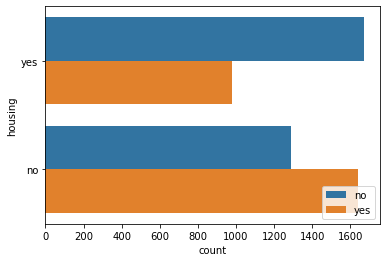

In [63]:
sns.countplot(y='housing', hue='deposit',data=bank)
plt.legend(loc="lower right")
plt.show()

1. Customers with No Housing loans prefer deposit more. 

In [64]:
pd.crosstab(index=bank['loan'], columns='count',normalize=True)

col_0,count
loan,
no,0.871349
yes,0.128651


In [65]:
pd.crosstab(index=bank['loan'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
loan,,
no,0.512441,0.487559
yes,0.650418,0.349582
All,0.530192,0.469808


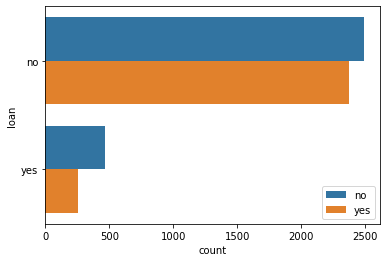

In [66]:
sns.countplot(y='loan', hue='deposit',data=bank)
plt.legend(loc="lower right")
plt.show()

1. Customers with no personnal loan prefer less deposit. 

In [67]:
pd.crosstab(index=bank['contact'], columns='count',normalize=True)

col_0,count
contact,
cellular,0.724601
telephone,0.068447
unknown,0.206952


In [68]:
pd.crosstab(index=bank['contact'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
contact,,
cellular,0.466370,0.533630
telephone,0.500000,0.500000
unknown,0.763636,0.236364
All,0.530192,0.469808


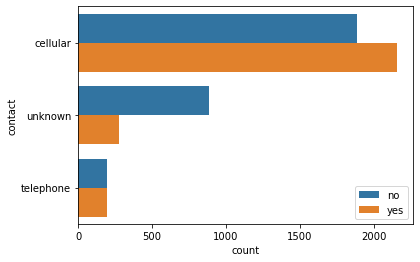

In [69]:
sns.countplot(y='contact', hue='deposit',data=bank)
plt.legend(loc="lower right")
plt.show()

1. It does not make much impact as all the maximum contacts are telephonic/celluar. 

In [70]:
pd.crosstab(index=bank['month'], columns='count',normalize=True)

col_0,count
month,
apr,0.080631
aug,0.135639
dec,0.010751
feb,0.068626
jan,0.032252
jul,0.134743
jun,0.112345
mar,0.023114
may,0.252105


In [71]:
pd.crosstab(index=bank['month'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
month,,
apr,0.384444,0.615556
aug,0.552180,0.447820
dec,0.116667,0.883333
feb,0.430809,0.569191
jan,0.622222,0.377778
jul,0.591755,0.408245
jun,0.531100,0.468900
mar,0.077519,0.922481
may,0.675906,0.324094


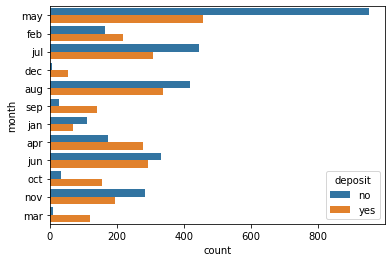

In [72]:
sns.countplot(y='month', hue='deposit',data=bank)
plt.show()

1. In month of May,june, july,August & Nov customers prefer less deposit.

In [73]:
pd.crosstab(index=bank['poutcome'], columns='count',normalize=True)

col_0,count
poutcome,
failure,0.113241
other,0.049633
success,0.096578
unknown,0.740548


In [74]:
pd.crosstab(index=bank['poutcome'], columns=bank['deposit'],normalize='index', margins=True)

deposit,no,yes
poutcome,,
failure,0.511076,0.488924
other,0.451264,0.548736
success,0.100186,0.899814
unknown,0.594483,0.405517
All,0.530192,0.469808


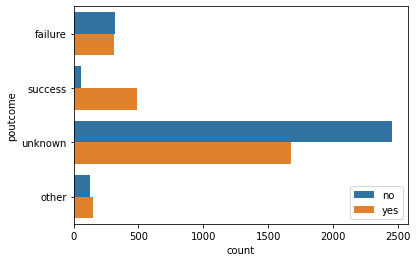

In [75]:
sns.countplot(y='poutcome', hue='deposit',data=bank)
plt.legend(loc="lower right")
plt.show()

1. There is no clarity if  Customers previosly contacts or not. 
2. 74% have unknown Status.
3. Does not impact much on the prefernce.

In [76]:
bank[bank[:]['poutcome']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
5,26,unemployed,single,secondary,no,632,no,no,cellular,12,feb,218,1,-1,0,unknown,yes
7,46,management,married,tertiary,no,3,no,no,cellular,18,aug,92,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5574,47,services,married,secondary,no,405,no,yes,cellular,8,aug,994,2,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no


During this campaing 89% peoplewho subscribed the last campaign subscribed this campaign. of the unkown during the last campaigns 40% subscribed the current campaign.

In [77]:
bank[bank[:]['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
5,26,unemployed,single,secondary,no,632,no,no,cellular,12,feb,218,1,-1,0,unknown,yes
7,46,management,married,tertiary,no,3,no,no,cellular,18,aug,92,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5574,47,services,married,secondary,no,405,no,yes,cellular,8,aug,994,2,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no


In [78]:
bank[bank[:]['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
5,26,unemployed,single,secondary,no,632,no,no,cellular,12,feb,218,1,-1,0,unknown,yes
7,46,management,married,tertiary,no,3,no,no,cellular,18,aug,92,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5574,47,services,married,secondary,no,405,no,yes,cellular,8,aug,994,2,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no


- For all the poutcomes='unknown' the pdays us -1 & previous is is 0 - with the matching records of 4133. 
- These are all new clients in this campaign and not previously contacted for any campaign. 
- pdays,previous & poutcomes are related to each other.

In [79]:
bank[bank[:]['poutcome']!='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
6,59,retired,married,primary,no,2074,no,no,cellular,21,dec,467,1,186,2,success,yes
9,35,blue-collar,divorced,secondary,no,336,yes,no,cellular,14,may,191,1,346,2,failure,yes
12,56,retired,divorced,primary,no,694,no,no,cellular,29,jan,144,1,102,1,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,73,retired,married,primary,no,542,no,no,cellular,26,oct,355,1,180,5,failure,yes
5570,66,retired,married,tertiary,no,1948,no,no,cellular,28,jan,216,1,91,4,success,yes
5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure,no
5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no


#### Step 4: Predictive Model

###### Model Building

In [80]:
X=bank.drop('deposit',axis=1)
Y=bank['deposit']

In [81]:
X=pd.get_dummies(X,drop_first=True)
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,41,88,11,105,1,336,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,56,1938,26,229,1,192,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,30,245,8,187,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,34,1396,17,630,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,29,-13,14,512,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,2235,15,755,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5577,40,-388,4,195,3,340,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5578,27,91,4,157,6,95,37,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5579,46,1568,2,310,1,55,6,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [82]:
# Spliting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=0)

In [83]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4923,31,165,15,218,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
296,35,471,5,276,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1265,30,486,28,335,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1431,34,341,8,195,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4841,52,2557,8,340,1,156,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,33,133,26,308,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3264,39,687,9,869,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1653,40,2040,18,906,2,350,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2607,31,628,12,1083,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
#con_vars=['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
X_train.iloc[:,:7]=scaler.fit_transform(X_train.iloc[:,:7])
X_train

C:\Users\Madhav\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4923,-0.855948,-0.438871,-0.077393,-0.440011,0.520645,-0.484627,-0.360933,0,0,0,...,0,0,0,1,0,0,0,0,0,1
296,-0.517725,-0.338012,-1.254567,-0.276448,-0.178080,-0.484627,-0.360933,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1265,-0.940504,-0.333068,1.452932,-0.110064,0.171283,-0.484627,-0.360933,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1431,-0.602281,-0.380860,-0.901415,-0.504872,-0.527443,-0.484627,-0.360933,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4841,0.919722,0.349545,-0.901415,-0.095964,-0.527443,0.912866,0.053350,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,-0.686837,-0.449418,1.217497,-0.186206,0.520645,-0.484627,-0.360933,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3264,-0.179502,-0.266817,-0.783697,1.395844,-0.527443,-0.484627,-0.360933,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1653,-0.094947,0.179139,0.275759,1.500186,-0.178080,2.639704,0.467633,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2607,-0.855948,-0.286264,-0.430545,1.999336,-0.178080,-0.484627,-0.360933,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [85]:
X_test.iloc[:,:7]=scaler.transform(X_test.iloc[:,:7])

C:\Users\Madhav\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [86]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2686,0.412388,-0.115198,0.511193,0.975656,-0.527443,-0.484627,-0.360933,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3473,-0.517725,-0.393056,0.393476,-0.282088,-0.178080,-0.484627,-0.360933,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3493,-0.771392,0.164637,0.275759,-0.290548,-0.527443,-0.484627,-0.360933,0,1,0,...,0,0,0,0,1,0,0,0,0,1
467,-0.094947,-0.460625,-0.783697,-1.012482,0.870008,-0.484627,-0.360933,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4422,0.581499,-0.309336,1.099780,0.166301,1.219371,-0.484627,-0.360933,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,-0.264058,-0.468206,1.688367,-0.434371,0.171283,-0.484627,-0.360933,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2103,-0.940504,-0.437882,1.335215,-0.956080,3.664911,-0.484627,-0.360933,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4194,-1.278727,-0.461614,-0.548263,-0.070584,-0.527443,0.147360,0.881915,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,-1.109615,-0.322850,-0.901415,0.865674,-0.527443,-0.484627,-0.360933,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [87]:
encoder=LabelEncoder()

Y_train=encoder.fit_transform(Y_train)
Y_test=encoder.transform(Y_test)

### Model Building using PCA

In [91]:
bank_encoded =bank.drop('deposit',axis=1)
bank_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown
5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure
5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other
5579,46,blue-collar,married,secondary,no,1568,yes,no,cellular,2,jun,310,1,55,6,other


In [92]:
bank_encoded=pd.get_dummies(bank_encoded)
bank_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,41,88,11,105,1,336,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,56,1938,26,229,1,192,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,30,245,8,187,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34,1396,17,630,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29,-13,14,512,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,2235,15,755,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5577,40,-388,4,195,3,340,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5578,27,91,4,157,6,95,37,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5579,46,1568,2,310,1,55,6,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [93]:
con_vars=['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
bank_encoded[con_vars]=scaler.fit_transform(bank_encoded[con_vars])
bank_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.014229,-0.436813,-0.554778,-0.764824,-0.544109,2.559623,0.497661,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1.243635,0.129587,1.218203,-0.404463,-0.544109,1.259340,1.362908,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.936663,-0.388745,-0.909374,-0.526521,-0.183159,-0.483401,-0.367587,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.601233,-0.036353,0.154414,0.760895,-0.544109,-0.483401,-0.367587,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-1.020521,-0.467735,-0.200182,0.417971,0.177791,-0.483401,-0.367587,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,0.572774,0.220517,-0.081983,1.124161,-0.183159,-0.483401,-0.367587,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5577,-0.098087,-0.582546,-1.382169,-0.503272,0.177791,2.595742,0.065037,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5578,-1.188236,-0.435894,-1.382169,-0.613705,1.260640,0.383454,15.639494,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5579,0.405059,0.016307,-1.618567,-0.169067,-0.544109,0.022265,2.228156,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [94]:
X=bank_encoded
Y=bank['deposit']

In [95]:
# Choosing the extent of the variance to be convered by PCs
PCA_Sklearn=PCA(n_components=0.95)
PCA_Sklearn

PCA(n_components=0.95)

In [96]:
Projected_bank_sklearn=PCA_Sklearn.fit_transform(bank_encoded.iloc[:,:51])
Projected_bank_sklearn_df=pd.DataFrame(Projected_bank_sklearn,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','P12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26'])

In [97]:
bank_PCA=pd.concat([Projected_bank_sklearn_df,bank.deposit],axis=1)
bank_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,deposit
0,2.523226,-0.477882,0.065479,-0.902959,-0.321556,-0.114926,1.014418,-1.298995,-0.457953,-0.197861,...,0.115557,0.132930,-0.326899,0.768583,-0.402788,0.032032,-0.491923,-0.291929,-0.185142,no
1,1.942331,1.256396,0.893757,-0.010589,-0.752088,-1.106044,0.005461,0.189113,0.882034,-0.426719,...,-0.236185,-0.638150,0.490802,-0.004455,0.237759,0.145677,0.365767,-0.215653,0.887303,yes
2,-0.523599,-1.143061,-0.462818,-0.738907,0.573909,0.115590,-0.651752,0.082784,1.184248,-0.154622,...,-0.408118,0.184776,0.109454,0.594285,-0.414974,0.019904,-0.271557,-0.000866,-0.225486,no
3,-0.582032,-0.821006,-0.585900,0.888044,0.226744,-0.411615,-0.477650,-0.085173,-0.987615,0.008182,...,-0.439199,0.309891,0.161599,-0.168541,-0.338142,-0.236020,0.088439,-0.056743,-0.029953,no
4,-0.669230,-1.537326,-0.244477,0.334607,0.089747,0.245843,0.459869,0.142097,0.373013,0.219663,...,-0.215036,-0.168107,-0.093641,0.009935,-0.081421,-0.065098,0.316532,0.065063,-0.019614,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,-0.760884,0.350904,-0.814102,0.617176,-0.675373,0.349301,1.524957,0.389434,0.013140,-0.076278,...,0.716805,0.018857,0.171770,-0.278357,0.023137,-0.012897,0.179286,-0.032017,-0.005645,no
5577,2.226990,-0.646026,-0.163953,-1.082842,-0.437579,0.979595,1.072287,-1.681424,-0.477553,-0.225890,...,0.021008,0.021022,-0.346239,-0.082067,-0.098405,-0.192736,0.029956,-0.178213,-0.090262,no
5578,9.970761,-1.353109,3.132673,0.368487,-0.546450,2.819608,-2.252630,11.276311,0.335573,0.189200,...,-0.395009,1.181533,-0.697653,-0.080962,0.219081,0.390443,-0.073894,0.798005,-0.248826,no
5579,2.001393,0.119349,-0.896829,-0.818178,-0.183647,0.918382,0.472268,1.683057,0.145157,-0.673421,...,-0.241846,-0.277497,0.065789,-0.274440,-0.374444,0.021091,-0.192057,0.433854,0.028985,yes


In [98]:
bank_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,deposit
0,2.523226,-0.477882,0.065479,-0.902959,-0.321556,-0.114926,1.014418,-1.298995,-0.457953,-0.197861,...,0.115557,0.132930,-0.326899,0.768583,-0.402788,0.032032,-0.491923,-0.291929,-0.185142,no
1,1.942331,1.256396,0.893757,-0.010589,-0.752088,-1.106044,0.005461,0.189113,0.882034,-0.426719,...,-0.236185,-0.638150,0.490802,-0.004455,0.237759,0.145677,0.365767,-0.215653,0.887303,yes
2,-0.523599,-1.143061,-0.462818,-0.738907,0.573909,0.115590,-0.651752,0.082784,1.184248,-0.154622,...,-0.408118,0.184776,0.109454,0.594285,-0.414974,0.019904,-0.271557,-0.000866,-0.225486,no
3,-0.582032,-0.821006,-0.585900,0.888044,0.226744,-0.411615,-0.477650,-0.085173,-0.987615,0.008182,...,-0.439199,0.309891,0.161599,-0.168541,-0.338142,-0.236020,0.088439,-0.056743,-0.029953,no
4,-0.669230,-1.537326,-0.244477,0.334607,0.089747,0.245843,0.459869,0.142097,0.373013,0.219663,...,-0.215036,-0.168107,-0.093641,0.009935,-0.081421,-0.065098,0.316532,0.065063,-0.019614,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,-0.760884,0.350904,-0.814102,0.617176,-0.675373,0.349301,1.524957,0.389434,0.013140,-0.076278,...,0.716805,0.018857,0.171770,-0.278357,0.023137,-0.012897,0.179286,-0.032017,-0.005645,no
5577,2.226990,-0.646026,-0.163953,-1.082842,-0.437579,0.979595,1.072287,-1.681424,-0.477553,-0.225890,...,0.021008,0.021022,-0.346239,-0.082067,-0.098405,-0.192736,0.029956,-0.178213,-0.090262,no
5578,9.970761,-1.353109,3.132673,0.368487,-0.546450,2.819608,-2.252630,11.276311,0.335573,0.189200,...,-0.395009,1.181533,-0.697653,-0.080962,0.219081,0.390443,-0.073894,0.798005,-0.248826,no
5579,2.001393,0.119349,-0.896829,-0.818178,-0.183647,0.918382,0.472268,1.683057,0.145157,-0.673421,...,-0.241846,-0.277497,0.065789,-0.274440,-0.374444,0.021091,-0.192057,0.433854,0.028985,yes


In [99]:
# Splitting the data
X_pca=bank_PCA.drop('deposit',axis=1)
Y_pca=bank_PCA['deposit']

In [100]:
print(f"Shape of the Features:{X_pca.shape}")
print(f"Shape of the Target varaible:{Y_pca.shape}")

Shape of the Features:(5581, 26)
Shape of the Target varaible:(5581,)


In [101]:
XP_train,XP_test,YP_train,YP_test=train_test_split(X_pca,Y_pca,test_size=0.3,random_state=0)

In [102]:
print(f"Shape of the training data:{XP_train.shape}")
print(f"Shape of the testing data:{XP_test.shape}")
print(f"Shape of the training labels:{YP_train.shape}")
print(f"Shape of the testing labels:{YP_test.shape}")

Shape of the training data:(3906, 26)
Shape of the testing data:(1675, 26)
Shape of the training labels:(3906,)
Shape of the testing labels:(1675,)


In [103]:
encoder=LabelEncoder()
YP_train=encoder.fit_transform(YP_train)
YP_test=encoder.transform(YP_test)

#### Evaluation And  Display Function

In [104]:
def evaluate (yt,yp):
    conf=confusion_matrix(yt,yp)
    acc=accuracy_score(yt,yp)
    precision=precision_score(yt,yp)
    recall=recall_score(yt,yp)
    F1_score=f1_score(yt,yp)
    return conf,acc,precision,recall,F1_score
# Display metrics
def display (yt,yp,ypp,model):
    conf,acc,precision,recall,F1_score=evaluate(yt,yp)
    auc=roc_auc_score(yt,ypp[:,1])
    print(f"Model:{model}")
    
    plt.figure(figsize=(10,6))
    sns.heatmap(conf,annot=True,fmt='d')
    plt.xlabel("True Condition")
    plt.ylabel("Predicted Condition")
    plt.show()
    
    print(f"Accuracy of the Model:{acc*100:.2f}")
    print(f"Precision of the Model:{precision:.2f}")
    print(f"Recall of the Model:{recall:.2f}")
    print(f"F1_Score of the Model:{F1_score:.2f}")
    print(f"Area under the curve is  : {auc:.2f}")
    print(f"Number of Misclassified samples:{(yt!=yp).sum()}")

### Linear Discriminant Analysis

In [105]:
# building the model
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

Model:LDA:Training


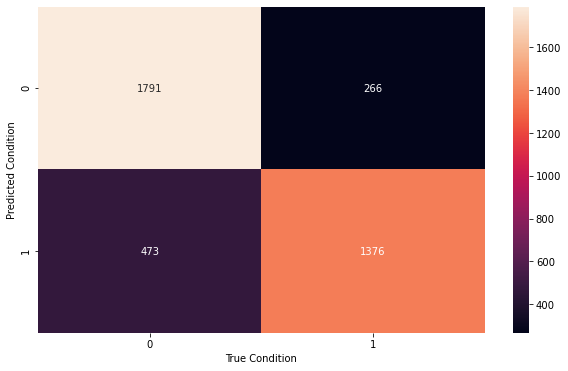

Accuracy of the Model:81.08
Precision of the Model:0.84
Recall of the Model:0.74
F1_Score of the Model:0.79
Area under the curve is  : 0.90
Number of Misclassified samples:739


In [106]:
# predicting the sample on training data set
YL_train_pred_lda=lda.predict(X_train)
YL_train_pprob_lda=lda.predict_proba(X_train)
display(Y_train,YL_train_pred_lda,YL_train_pprob_lda,"LDA:Training")

Model:LDA:Testing


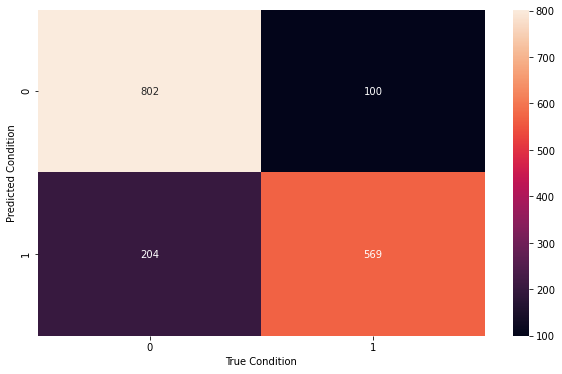

Accuracy of the Model:81.85
Precision of the Model:0.85
Recall of the Model:0.74
F1_Score of the Model:0.79
Area under the curve is  : 0.90
Number of Misclassified samples:304


In [107]:
# predicting the model on test data
YL_test_pred_lda=lda.predict(X_test)
YL_test_pprob_lda=lda.predict_proba(X_test)
display(Y_test,YL_test_pred_lda,YL_test_pprob_lda,"LDA:Testing")

### Full Model using Logistic Regression

In [108]:
model1=LogisticRegression(max_iter=500,random_state=0)

In [109]:
model1.fit(X_train,Y_train)

LogisticRegression(max_iter=500, random_state=0)

In [110]:
Y_preds=model1.predict(X_test)
Y_preds

array([1, 0, 0, ..., 1, 1, 1])

In [111]:
# predict probabilities
pred_prob=model1.predict_proba(X_test)
pred_prob

array([[0.16705786, 0.83294214],
       [0.70188416, 0.29811584],
       [0.84787757, 0.15212243],
       ...,
       [0.37497884, 0.62502116],
       [0.25124052, 0.74875948],
       [0.01614918, 0.98385082]])

Model:Logistic Regression Full Model


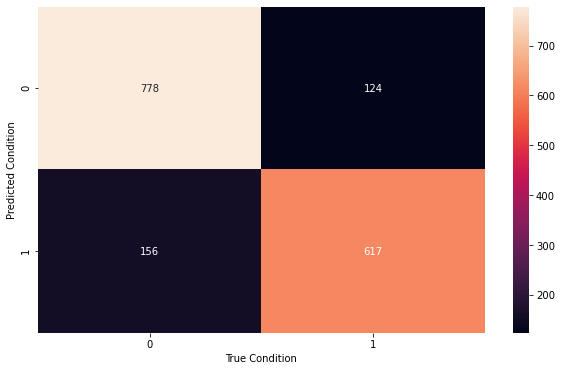

Accuracy of the Model:83.28
Precision of the Model:0.83
Recall of the Model:0.80
F1_Score of the Model:0.82
Area under the curve is  : 0.90
Number of Misclassified samples:280


In [112]:
display(Y_test,Y_preds,pred_prob,"Logistic Regression Full Model")

In [113]:
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1])

In [114]:
# roc Curve for tpr=fpr
random_probs=[0 for i in range(len(Y_test))]
rp_fpr,rp_tpr,_=roc_curve(Y_test,random_probs)

In [115]:
thresh

array([1.99999858e+00, 9.99998584e-01, 9.98202877e-01, 9.98168865e-01,
       9.97857607e-01, 9.97690351e-01, 9.97224959e-01, 9.96735643e-01,
       9.92486891e-01, 9.92360737e-01, 9.91854148e-01, 9.91832673e-01,
       9.91799125e-01, 9.91254121e-01, 9.91155279e-01, 9.91091119e-01,
       9.87782151e-01, 9.87283003e-01, 9.84387653e-01, 9.84137352e-01,
       9.80136152e-01, 9.79640425e-01, 9.78745378e-01, 9.78473670e-01,
       9.77641636e-01, 9.76702012e-01, 9.71442798e-01, 9.70870512e-01,
       9.70093216e-01, 9.70058354e-01, 9.66099158e-01, 9.65998231e-01,
       9.57594061e-01, 9.57191418e-01, 9.55715674e-01, 9.55537464e-01,
       9.50219974e-01, 9.49980580e-01, 9.46239947e-01, 9.44446270e-01,
       9.37350290e-01, 9.36202541e-01, 9.31473171e-01, 9.31164882e-01,
       9.28419795e-01, 9.27045219e-01, 9.24901825e-01, 9.24698421e-01,
       9.19267815e-01, 9.18673682e-01, 9.17300838e-01, 9.16562663e-01,
       9.12077726e-01, 9.12064831e-01, 9.10104780e-01, 9.09915639e-01,
      

In [116]:
accuracy_list=[]
# assigning the class based on the threshold values
for threshold in thresh:
    Y_pred_thresh=np.where(pred_prob[:,1]>threshold,1,0)
    accuracy_list.append(accuracy_score(Y_test,Y_pred_thresh))

In [117]:
accuracy_thresh_df=pd.concat([pd.Series(thresh),pd.Series(accuracy_list)],axis=1)
accuracy_thresh_df.columns=['Threshold','Accuracy']
accuracy_thresh_df.sort_values(by="Accuracy",ascending=False,inplace=True)

In [118]:
accuracy_thresh_df

,Threshold,Accuracy
254,0.414817,0.841791
253,0.416843,0.841194
252,0.417764,0.840597
242,0.429010,0.840000
251,0.418724,0.840000
...,...,...
0,1.999999,0.538507
1,0.999999,0.538507
397,0.034875,0.506866
398,0.034408,0.506269


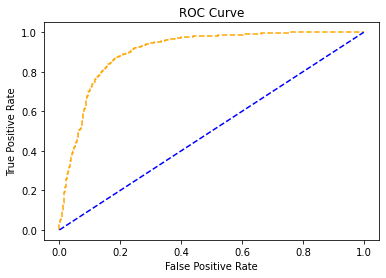

In [119]:
# plot ROC Curve
plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(rp_fpr,rp_tpr,linestyle='--',color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [120]:
# auc_score
auc_score=roc_auc_score(Y_test,pred_prob[:,1])
print(f" AUC_ Score for the Logestic Regression Model:{auc_score}")
# random auc_score
random_auc=roc_auc_score(Y_test,random_probs)
print(f" AUC_ Score for the Random Prediction:{random_auc}")

 AUC_ Score for the Logestic Regression Model:0.9040066203319919
 AUC_ Score for the Random Prediction:0.5


##### Conclusion
The higher AUC score indicates the high chances that the classifier will be able to distingush the positive class from the negative class

#### Hyper Parameter tuning for Full model Logistic Regression

In [125]:
param_grid = {'penalty':['l1','l2'],"C": [1e-3, 1e-2, 1e-1, 1, 10],'solver':['liblinear','saga']} 
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, random_state=0),
                           param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [126]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [127]:
logistic_regression = LogisticRegression(C = 1, penalty= 'l2',solver= 'liblinear', max_iter=10000, random_state=0)
logistic_regression.fit(X_train, Y_train)

Y_pred_LogisticRegr_Grid = logistic_regression.predict(X_test)
Y_pprob_LogisticRegr_Grid=logistic_regression.predict_proba(X_test)

Model:Logistic Regression with Hyper Tuning Parameter:


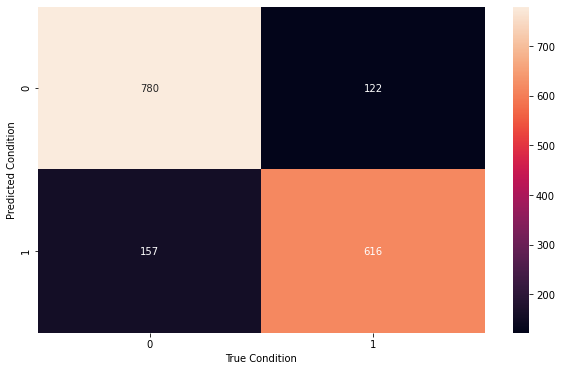

Accuracy of the Model:83.34
Precision of the Model:0.83
Recall of the Model:0.80
F1_Score of the Model:0.82
Area under the curve is  : 0.90
Number of Misclassified samples:279


In [128]:
display(Y_test,Y_pred_LogisticRegr_Grid,Y_pprob_LogisticRegr_Grid ,"Logistic Regression with Hyper Tuning Parameter:")

### Predictive Model - Logistic Regresion using PCA

In [129]:
model2=LogisticRegression(random_state=0)

In [130]:
model2.fit(XP_train,YP_train)

LogisticRegression(random_state=0)

In [131]:
model2.coef_

array([[ 0.38514097,  0.06835384, -0.91063112,  1.48817115, -0.60124369,
         0.20525343, -1.09118038, -0.29980023,  0.35387054,  0.06990317,
        -0.13885401, -0.54929047, -0.04459728, -0.39099439,  0.267534  ,
        -0.20496479,  0.12268627,  0.25147473, -1.27333413,  1.11456823,
         0.19205224,  0.35054082,  0.65945453,  0.30568903, -0.80093581,
         0.34656167]])

In [132]:
model2.intercept_

array([-0.02159073])

In [133]:
YP_preds=model2.predict(XP_test)
YP_preds

array([1, 0, 0, ..., 1, 1, 1])

In [134]:
# predict probabilities
YP_pred_prob=model2.predict_proba(XP_test)
YP_pred_prob

array([[0.15341284, 0.84658716],
       [0.67173215, 0.32826785],
       [0.78292176, 0.21707824],
       ...,
       [0.30244237, 0.69755763],
       [0.2191563 , 0.7808437 ],
       [0.01240578, 0.98759422]])

Model:Logistic Regression using PCA


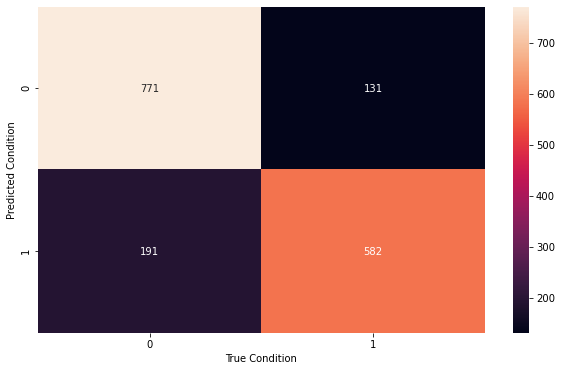

Accuracy of the Model:80.78
Precision of the Model:0.82
Recall of the Model:0.75
F1_Score of the Model:0.78
Area under the curve is  : 0.89
Number of Misclassified samples:322


In [135]:
display(YP_test,YP_preds,YP_pred_prob,"Logistic Regression using PCA")

In [136]:
fpr_p,tpr_p,thresh_p=roc_curve(YP_test,YP_pred_prob[:,1])

In [137]:
# roc Curve for tpr=fpr
random_probs_p=[0 for i in range(len(YP_test))]
rp_fpr_p,rp_tpr_p,_=roc_curve(YP_test,random_probs_p)

In [138]:
thresh_p

array([1.99998578e+00, 9.99985783e-01, 9.98822128e-01, 9.98741569e-01,
       9.97098926e-01, 9.96798695e-01, 9.95752358e-01, 9.95335771e-01,
       9.92820168e-01, 9.92818308e-01, 9.91106978e-01, 9.90750731e-01,
       9.89644662e-01, 9.89626963e-01, 9.87594222e-01, 9.87464872e-01,
       9.85634940e-01, 9.84843523e-01, 9.84344107e-01, 9.84324371e-01,
       9.84181379e-01, 9.83300352e-01, 9.79297948e-01, 9.77826398e-01,
       9.61036471e-01, 9.60970201e-01, 9.49718466e-01, 9.49155706e-01,
       9.48933608e-01, 9.48452265e-01, 9.48319040e-01, 9.48301228e-01,
       9.48204199e-01, 9.47994938e-01, 9.45849602e-01, 9.44435601e-01,
       9.41886962e-01, 9.41876507e-01, 9.35402638e-01, 9.34869298e-01,
       9.24223728e-01, 9.23500532e-01, 9.21744963e-01, 9.21368126e-01,
       9.19498756e-01, 9.19255746e-01, 9.19231807e-01, 9.19208289e-01,
       9.17211721e-01, 9.16373654e-01, 9.11708952e-01, 9.11625253e-01,
       8.98075187e-01, 8.96108500e-01, 8.89040881e-01, 8.88906761e-01,
      

In [139]:
accuracy_list_PCA=[]
# assigning the class based on the threshold values
for threshold in thresh_p:
    YP_pred_thresh=np.where(YP_pred_prob[:,1]>threshold,1,0)
    accuracy_list_PCA.append(accuracy_score(YP_test,YP_pred_thresh))

In [140]:
accuracy_thresh_PCA_df=pd.concat([pd.Series(thresh_p),pd.Series(accuracy_list_PCA)],axis=1)
accuracy_thresh_PCA_df.columns=['Threshold','Accuracy']
accuracy_thresh_PCA_df.sort_values(by="Accuracy",ascending=False,inplace=True)

In [141]:
accuracy_thresh_PCA_df

,Threshold,Accuracy
245,0.432715,0.822090
244,0.434514,0.821493
246,0.431808,0.821493
247,0.427778,0.820299
249,0.426084,0.820299
...,...,...
0,1.999986,0.538507
1,0.999986,0.538507
447,0.051975,0.532537
448,0.051939,0.531940


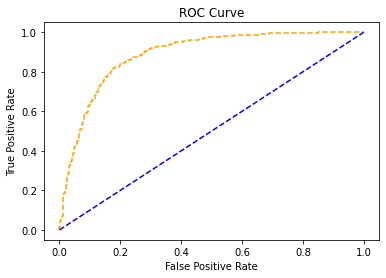

In [142]:
# plot ROC Curve
plt.plot(fpr_p,tpr_p,linestyle='--',color='orange')
plt.plot(rp_fpr_p,rp_tpr_p,linestyle='--',color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [143]:
# auc_score
auc_score_PCA=roc_auc_score(YP_test,YP_pred_prob[:,1])
print(f" AUC_ Score for the Logestic Regression Model:{auc_score_PCA}")
# random auc_score
random_auc_PCA=roc_auc_score(YP_test,random_probs_p)
print(f" AUC_ Score for the Random Prediction:{random_auc_PCA}")

 AUC_ Score for the Logestic Regression Model:0.8874773035628746
 AUC_ Score for the Random Prediction:0.5


### Hypertuning Logistic Regression Model using PCA

In [144]:
param_grid = {'penalty':['l1','l2'],"C": [1e-3, 1e-2, 1e-1, 1, 10],'solver':['liblinear','saga']} 
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, random_state=0),
                           param_grid, cv=5)
grid_search.fit(XP_train, YP_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [123]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [145]:
logistic_regression_PCA = LogisticRegression(C = 0.1, penalty= 'l1', solver= 'saga',max_iter=10000, random_state=0)
logistic_regression_PCA.fit(XP_train, YP_train)

Y_pred_LogisticRegr_PCA_Grid = logistic_regression_PCA.predict(XP_test)
Y_prob_LogisticRegr_PCA_Grid = logistic_regression_PCA.predict_proba(XP_test)

Model:Logistic Regression using PCA with Hyper Tuning Parameter:


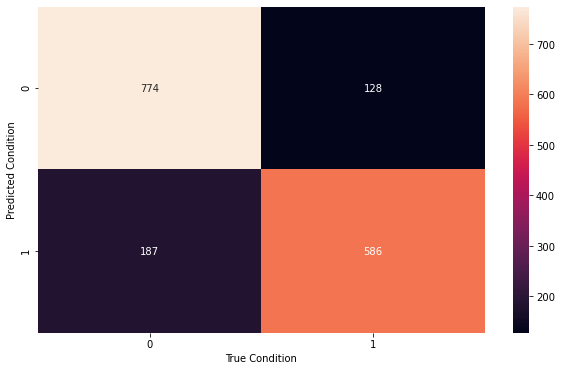

Accuracy of the Model:81.19
Precision of the Model:0.82
Recall of the Model:0.76
F1_Score of the Model:0.79
Area under the curve is  : 0.89
Number of Misclassified samples:315


In [146]:
display(YP_test,Y_pred_LogisticRegr_PCA_Grid,Y_prob_LogisticRegr_PCA_Grid ,"Logistic Regression using PCA with Hyper Tuning Parameter:")

### K Nearest Neighbors Classifier

In [147]:
KNN_model1=KNeighborsClassifier(n_neighbors=5) # default value of K=5

In [148]:
KNN_model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [149]:
Y_preds_KNN=KNN_model1.predict(X_test)
Y_preds_KNN

array([0, 0, 0, ..., 1, 1, 1])

In [151]:
Y_pprob_KNN=model1.predict_proba(X_test)
Y_pprob_KNN

array([[0.16705786, 0.83294214],
       [0.70188416, 0.29811584],
       [0.84787757, 0.15212243],
       ...,
       [0.37497884, 0.62502116],
       [0.25124052, 0.74875948],
       [0.01614918, 0.98385082]])

Model:KNearest Neighbour Full Model


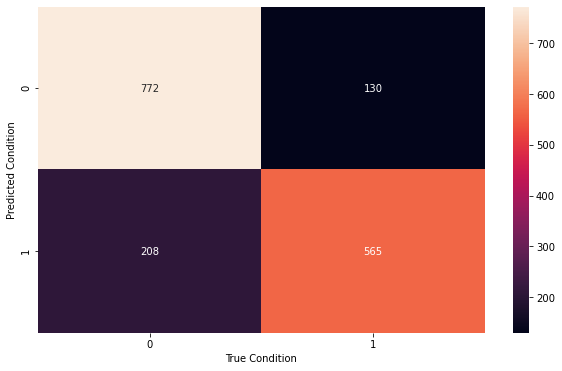

Accuracy of the Model:79.82
Precision of the Model:0.81
Recall of the Model:0.73
F1_Score of the Model:0.77
Area under the curve is  : 0.90
Number of Misclassified samples:338


In [152]:
display(Y_test,Y_preds_KNN,Y_pprob_KNN,"KNearest Neighbour Full Model")

In [156]:
# Elbow method to determine value of K
misclassified_samples=[]
acc1=[]

for k in range(1,20,2):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train) 
    Y_preds_knn=knn_model.predict(X_test) 
    acc1.append(round(accuracy_score(Y_test,Y_preds_knn),3))
    misclassified_samples.append((Y_test!=Y_preds_knn).sum())

print(f"Misclassified Sample for different K values:{misclassified_samples}")
print(f"Accuracy for different K values:{acc1}")


Misclassified Sample for different K values:[418, 348, 338, 338, 341, 335, 334, 334, 339, 340]
Accuracy for different K values:[0.75, 0.792, 0.798, 0.798, 0.796, 0.8, 0.801, 0.801, 0.798, 0.797]


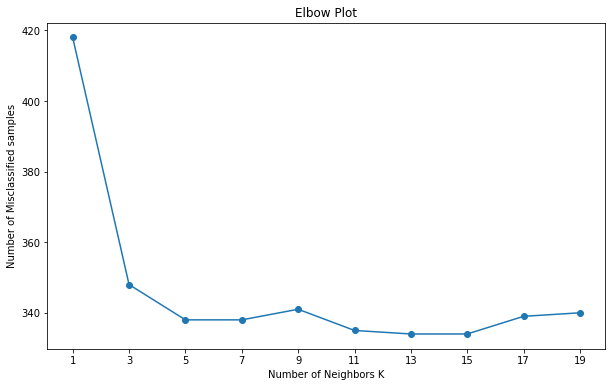

In [157]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),misclassified_samples,marker='o')
plt.xticks(range(1,20,2))
plt.title("Elbow Plot")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Number of Misclassified samples")
plt.show()

K value shows least error value at 13

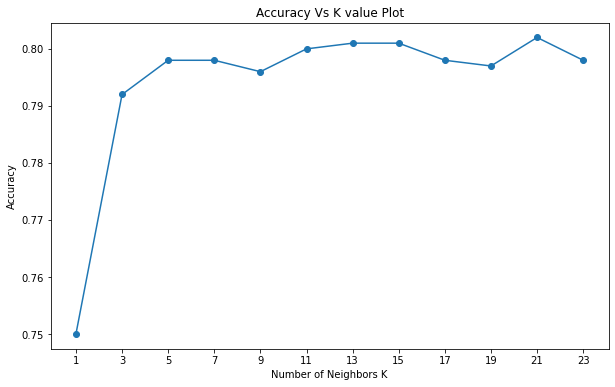

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),acc1, marker="o")
plt.xticks(range(1,20,2))
plt.title("Accuracy Vs K value Plot")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.show()

K value has maximum accuracy at 13

##### KNearest Neighbors Classifier(K =13)

In [158]:
KNN_k13_model1=KNeighborsClassifier(n_neighbors=13)

In [159]:
KNN_k13_model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [160]:
Y_preds_KNN_K13=KNN_k13_model1.predict(X_test)
Y_preds_KNN_K13

array([0, 0, 0, ..., 1, 1, 1])

In [161]:
Y_pprob_KNN_K13=KNN_k13_model1.predict_proba(X_test)
Y_pprob_KNN_K13

array([[0.69230769, 0.30769231],
       [0.53846154, 0.46153846],
       [1.        , 0.        ],
       ...,
       [0.23076923, 0.76923077],
       [0.38461538, 0.61538462],
       [0.23076923, 0.76923077]])

Model:KNearest Neighbour with K=13


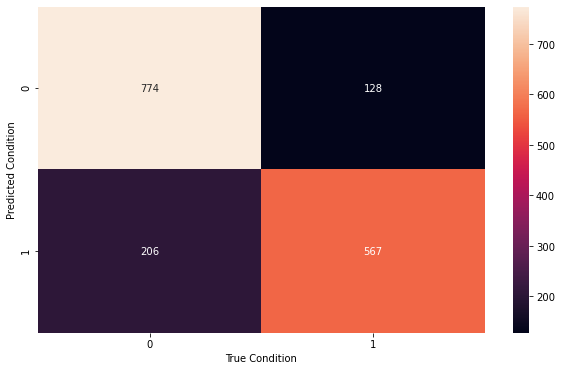

Accuracy of the Model:80.06
Precision of the Model:0.82
Recall of the Model:0.73
F1_Score of the Model:0.77
Area under the curve is  : 0.89
Number of Misclassified samples:334


In [163]:
display(Y_test,Y_preds_KNN_K13,Y_pprob_KNN_K13,"KNearest Neighbour with K=13")

### Hyper tuning parameter of  KNN 

In [164]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
metric_options=['minkowski','euclidean','manhattan']
param_grid_knn = dict(n_neighbors = k_range, weights = weight_options,metric=metric_options)

In [165]:
knn = KNeighborsClassifier()

In [166]:
grid = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'accuracy')

In [167]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [168]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8054206833234966
{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=11, weights='distance')


In [169]:
# building the model
KNN_model_grid_k11=KNeighborsClassifier(n_neighbors=11,weights='distance',metric= 'minkowski') 

In [170]:
KNN_model_grid_k11.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [171]:
Y_preds_KNN_grids=KNN_model_grid_k11.predict(X_test)
Y_preds_KNN_grids

array([0, 0, 0, ..., 1, 1, 1])

In [172]:
Y_pprob_KNN_grids=KNN_model_grid_k11.predict_proba(X_test)
Y_pprob_KNN_grids

array([[0.7505665 , 0.2494335 ],
       [0.55952923, 0.44047077],
       [1.        , 0.        ],
       ...,
       [0.27778617, 0.72221383],
       [0.48279354, 0.51720646],
       [0.21485504, 0.78514496]])

Model:KNN at k=11 after Hypertuning the parameters:


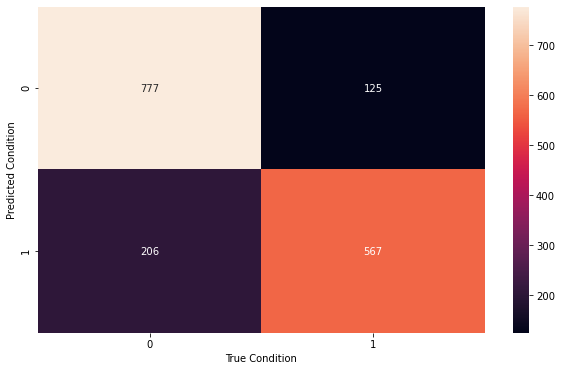

Accuracy of the Model:80.24
Precision of the Model:0.82
Recall of the Model:0.73
F1_Score of the Model:0.77
Area under the curve is  : 0.89
Number of Misclassified samples:331


In [173]:
display(Y_test,Y_preds_KNN_grids,Y_pprob_KNN_grids,"KNN at k=11 after Hypertuning the parameters:")

### K Nearest Neighbors Classifier using PCA

In [174]:
KNN_model_PCA=KNeighborsClassifier(n_neighbors=5) # default value of K=5

In [175]:
KNN_model_PCA.fit(XP_train,YP_train)

KNeighborsClassifier()

In [176]:
Y_preds_KNN_PCA=KNN_model_PCA.predict(XP_test)
Y_preds_KNN_PCA

array([0, 1, 0, ..., 1, 1, 1])

In [177]:
Y_pprob_KNN_PCA=KNN_model_PCA.predict_proba(XP_test)
Y_pprob_KNN_PCA

array([[0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8]])

Model:KNN using PCA


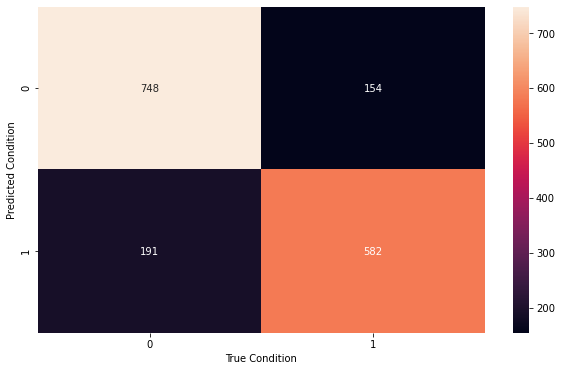

Accuracy of the Model:79.40
Precision of the Model:0.79
Recall of the Model:0.75
F1_Score of the Model:0.77
Area under the curve is  : 0.86
Number of Misclassified samples:345


In [178]:
display(YP_test,Y_preds_KNN_PCA,Y_pprob_KNN_PCA,"KNN using PCA")

In [180]:
# Elbow method to determine value of K
misclassified_samples_PCA=[]
acc_PCA=[]

for k in range(1,20,2):
    knn_model_PCA=KNeighborsClassifier(n_neighbors=k)
    knn_model_PCA.fit(XP_train,YP_train) 
    Y_preds_knn_PCA=knn_model_PCA.predict(XP_test) 
    acc_PCA.append(round(accuracy_score(YP_test,Y_preds_knn_PCA),3))
    misclassified_samples_PCA.append((YP_test!=Y_preds_knn_PCA).sum())

print(f"Misclassified Sample for different K values:{misclassified_samples_PCA}")
print(f"Accuracy for different K values:{acc_PCA}")


Misclassified Sample for different K values:[427, 362, 345, 342, 357, 337, 334, 340, 348, 352]
Accuracy for different K values:[0.745, 0.784, 0.794, 0.796, 0.787, 0.799, 0.801, 0.797, 0.792, 0.79]


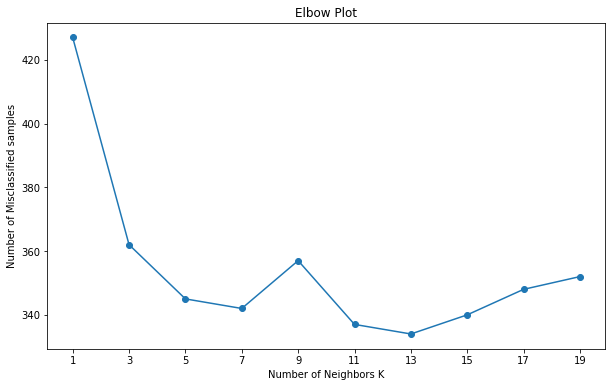

In [181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),misclassified_samples_PCA,marker='o')
plt.xticks(range(1,20,2))
plt.title("Elbow Plot")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Number of Misclassified samples")
plt.show()

Considering K=13 as the minimum error point

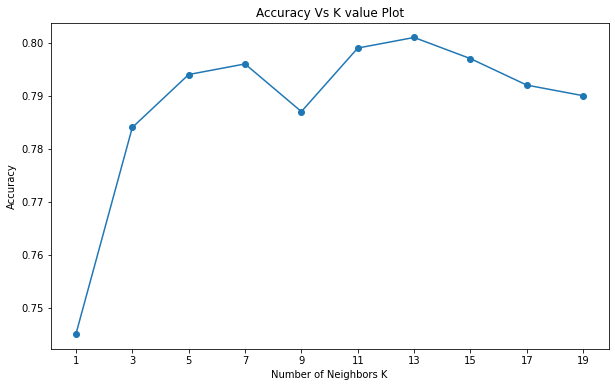

In [183]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),acc_PCA, marker="o")
plt.xticks(range(1,20,2))
plt.title("Accuracy Vs K value Plot")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.show()

##### KNN with PCA at K=13

In [184]:
KNN_model_PCA_K13=KNeighborsClassifier(n_neighbors=13) 

In [185]:
KNN_model_PCA_K13.fit(XP_train,YP_train)

KNeighborsClassifier(n_neighbors=13)

In [186]:
Y_preds_KNN_PCA_K13=KNN_model_PCA_K13.predict(XP_test)
Y_preds_KNN_PCA_K13

array([0, 1, 0, ..., 1, 1, 1])

In [187]:
Y_pprob_KNN_PCA_K13=KNN_model_PCA_K13.predict_proba(XP_test)
Y_pprob_KNN_PCA_K13

array([[0.61538462, 0.38461538],
       [0.38461538, 0.61538462],
       [1.        , 0.        ],
       ...,
       [0.30769231, 0.69230769],
       [0.38461538, 0.61538462],
       [0.46153846, 0.53846154]])

Model:KNN using PCA at K=13


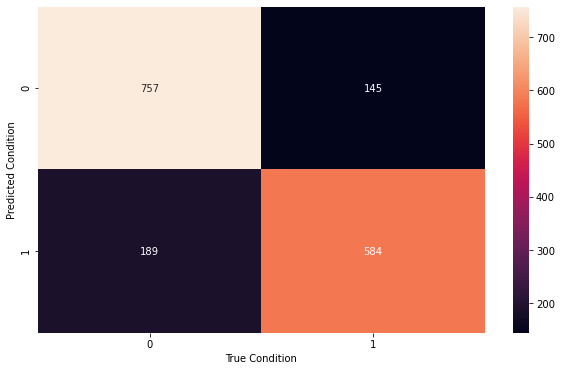

Accuracy of the Model:80.06
Precision of the Model:0.80
Recall of the Model:0.76
F1_Score of the Model:0.78
Area under the curve is  : 0.88
Number of Misclassified samples:334


In [188]:
display(YP_test,Y_preds_KNN_PCA_K13,Y_pprob_KNN_PCA_K13,"KNN using PCA at K=13")

### Hyper Tuning KNN using PCA

In [189]:
grid.fit(XP_train,YP_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [190]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.800038691061709
{'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=23, weights='distance')


In [191]:
# building the model
KNN_model_grid_PCA_k23=KNeighborsClassifier(n_neighbors=23,weights='distance',metric='minkowski') 

In [192]:
KNN_model_grid_PCA_k23.fit(XP_train,YP_train)

KNeighborsClassifier(n_neighbors=23, weights='distance')

In [193]:
Y_preds_KNN_grids_PCA=KNN_model_grid_PCA_k23.predict(XP_test)
Y_preds_KNN_grids_PCA

array([0, 0, 0, ..., 1, 1, 1])

In [194]:
Y_pprob_KNN_grids_PCA=KNN_model_grid_PCA_k23.predict_proba(XP_test)
Y_pprob_KNN_grids_PCA

array([[0.70274095, 0.29725905],
       [0.52765279, 0.47234721],
       [0.92919381, 0.07080619],
       ...,
       [0.26092372, 0.73907628],
       [0.3835116 , 0.6164884 ],
       [0.37033626, 0.62966374]])

Model:KNN using PCA at k=23 after Hypertuning the parameters:


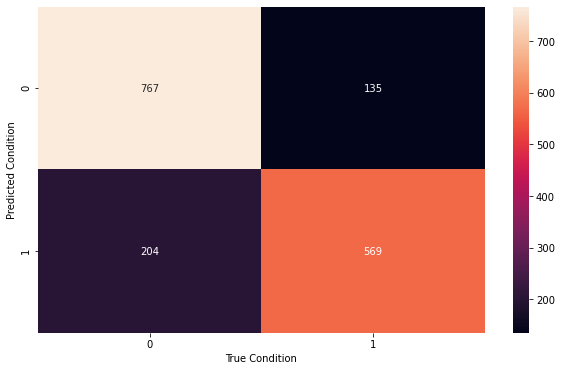

Accuracy of the Model:79.76
Precision of the Model:0.81
Recall of the Model:0.74
F1_Score of the Model:0.77
Area under the curve is  : 0.89
Number of Misclassified samples:339


In [196]:
display(YP_test,Y_preds_KNN_grids_PCA,Y_pprob_KNN_grids_PCA,"KNN using PCA at k=23 after Hypertuning the parameters:")

### Decision Tree 

In [197]:
#Model Building
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [198]:
# Predicting the test data
y_pred_DecisionTree=model_tree.predict(X_test)

In [199]:
y_pprob_DecisionTree=model_tree.predict_proba(X_test)

Model:Decision Tree Full Model


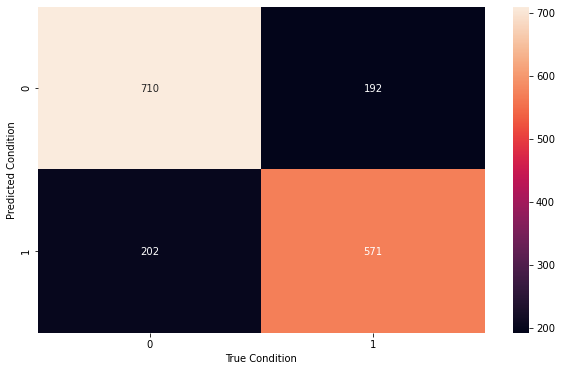

Accuracy of the Model:76.48
Precision of the Model:0.75
Recall of the Model:0.74
F1_Score of the Model:0.74
Area under the curve is  : 0.76
Number of Misclassified samples:394


In [200]:
display(Y_test,y_pred_DecisionTree,y_pprob_DecisionTree,"Decision Tree Full Model")

### Hyper Tuning Decision Tree

In [201]:
parameter_grid = {'max_depth': [8,10],
                  'min_samples_leaf':[1,3,5,15],
                  'min_samples_split': [2,4],
                  'criterion':['gini','entropy'],
                 }

In [202]:
decision_tree=DecisionTreeClassifier(random_state=0)

In [203]:
grid_search = GridSearchCV(decision_tree, param_grid = parameter_grid,
                          cv =10)

In [204]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10],
                         'min_samples_leaf': [1, 3, 5, 15],
                         'min_samples_split': [2, 4]})

In [205]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [206]:
# building the model
decision_tree_grid=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,min_samples_leaf= 15,min_samples_split= 2,random_state=0)

In [207]:
decision_tree_grid.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=15,
                       random_state=0)

In [208]:
Y_preds_decision_grids=decision_tree_grid.predict(X_test)
Y_preds_decision_grids

array([1, 0, 0, ..., 0, 1, 1])

In [209]:
Y_pprob_decision_grids=decision_tree_grid.predict_proba(X_test)
Y_pprob_decision_grids

array([[0.12      , 0.88      ],
       [0.51612903, 0.48387097],
       [0.76923077, 0.23076923],
       ...,
       [0.875     , 0.125     ],
       [0.12      , 0.88      ],
       [0.17857143, 0.82142857]])

Model:Decision Tree with HyperTuning Parameters


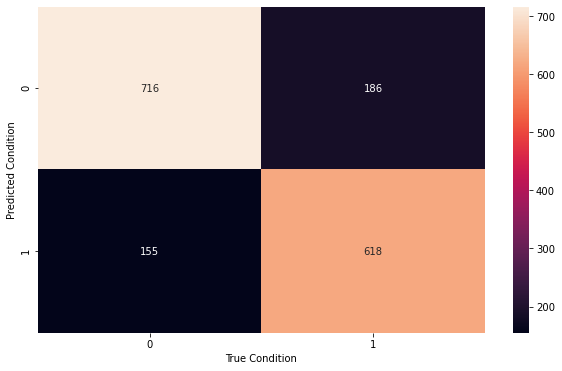

Accuracy of the Model:79.64
Precision of the Model:0.77
Recall of the Model:0.80
F1_Score of the Model:0.78
Area under the curve is  : 0.87
Number of Misclassified samples:341


In [211]:
display(Y_test,Y_preds_decision_grids,Y_pprob_decision_grids,"Decision Tree with HyperTuning Parameters")

### Decision Tree with PCA

In [212]:
#Model Building
model_tree_PCA=DecisionTreeClassifier()
model_tree_PCA.fit(XP_train,YP_train)

DecisionTreeClassifier()

In [215]:
y_pred_DecisionTree_PCA=model_tree_PCA.predict(XP_test)
y_pprob_DecisionTree_PCA=model_tree_PCA.predict_proba(XP_test)

Model:Decision Tree with PCA


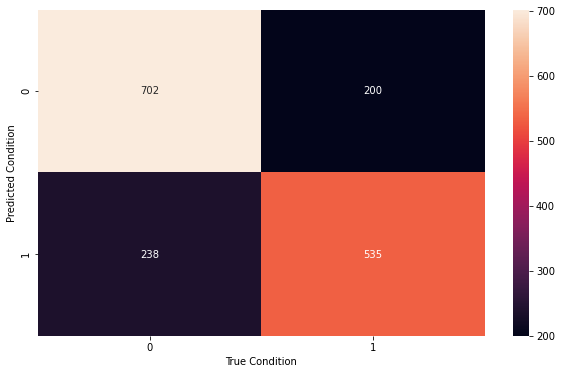

Accuracy of the Model:73.85
Precision of the Model:0.73
Recall of the Model:0.69
F1_Score of the Model:0.71
Area under the curve is  : 0.74
Number of Misclassified samples:438


In [216]:
display(YP_test,y_pred_DecisionTree_PCA,y_pprob_DecisionTree_PCA,"Decision Tree with PCA")

### Hypertuning Decision Tree with PCA

In [217]:
grid_search.fit(XP_train,YP_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10],
                         'min_samples_leaf': [1, 3, 5, 15],
                         'min_samples_split': [2, 4]})

In [218]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [219]:
decision_tree_grid_PCA=DecisionTreeClassifier(criterion= 'gini',max_depth= 8,min_samples_leaf= 3,min_samples_split= 2,random_state=0)

In [220]:
decision_tree_grid_PCA.fit(XP_train,YP_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=0)

In [221]:
Y_preds_decision_grids_PCA=decision_tree_grid_PCA.predict(XP_test)
Y_preds_decision_grids_PCA

array([1, 0, 1, ..., 1, 1, 1])

In [222]:
Y_pprob_decision_grids_PCA=decision_tree_grid_PCA.predict_proba(XP_test)
Y_pprob_decision_grids_PCA

array([[0.12264151, 0.87735849],
       [0.89873418, 0.10126582],
       [0.45783133, 0.54216867],
       ...,
       [0.31288344, 0.68711656],
       [0.12264151, 0.87735849],
       [0.12264151, 0.87735849]])

Model:Decision tree using PCA with Hypertuned Parameters


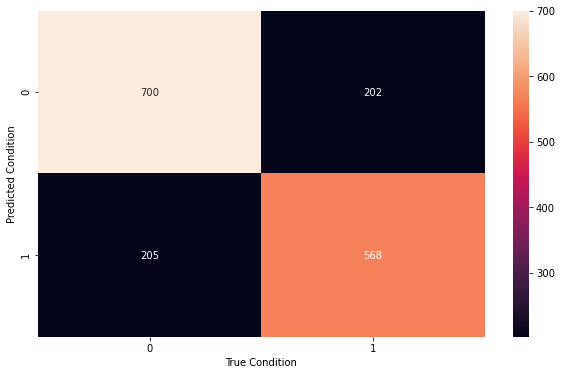

Accuracy of the Model:75.70
Precision of the Model:0.74
Recall of the Model:0.73
F1_Score of the Model:0.74
Area under the curve is  : 0.79
Number of Misclassified samples:407


In [223]:
display(YP_test,Y_preds_decision_grids_PCA,Y_pprob_decision_grids_PCA,"Decision tree using PCA with Hypertuned Parameters")

### Random Forest

In [224]:
rf=RandomForestClassifier(n_estimators=40,random_state=0) # estimator should be 40-50 else the for big data set it will take lot
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [225]:
predictions_rf=rf.predict(X_test)

In [226]:
probpred_rf=rf.predict_proba(X_test)

Model:Random Forest Full Model


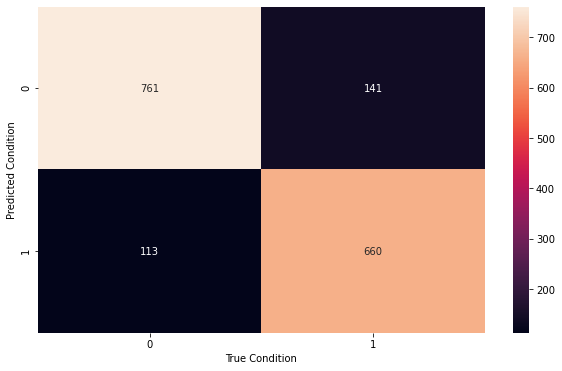

Accuracy of the Model:84.84
Precision of the Model:0.82
Recall of the Model:0.85
F1_Score of the Model:0.84
Area under the curve is  : 0.91
Number of Misclassified samples:254


In [227]:
display(Y_test,predictions_rf,probpred_rf,"Random Forest Full Model")

#### Hyper Tuning Random Forest

In [228]:
rfc=RandomForestClassifier(random_state=42)

In [229]:
param_grid_rf = { 
    'n_estimators': [10,20,50],
    'min_samples_leaf': [1,3,4,5],
    'max_depth' : [10,20],
    'min_samples_split':[2,4,5],
    'criterion' :['gini', 'entropy'],
    'bootstrap':['True','False']
}

In [230]:
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)
grid_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [10, 20, 50]})

In [231]:
grid_rfc.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [232]:
rfc1=RandomForestClassifier(random_state=42, bootstrap=True, criterion= 'gini',max_depth= 20,
                            min_samples_leaf= 3,min_samples_split= 2,n_estimators= 50)

In [233]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [234]:
Y_preds_random_grids=rfc1.predict(X_test)
Y_pprob_random_grids=rfc1.predict_proba(X_test)

Model:Random Forest with Hypertuned Parameters


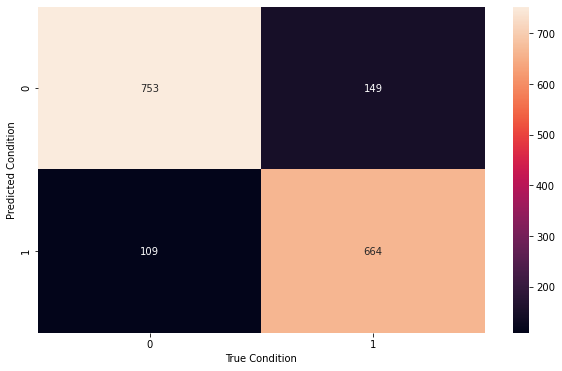

Accuracy of the Model:84.60
Precision of the Model:0.82
Recall of the Model:0.86
F1_Score of the Model:0.84
Area under the curve is  : 0.91
Number of Misclassified samples:258


In [235]:
display(Y_test,Y_preds_random_grids,Y_pprob_random_grids,"Random Forest with Hypertuned Parameters")

### Random Forest with PCA

In [236]:
rf_PCA=RandomForestClassifier(n_estimators=40,random_state=0) # estimator should be 40-50 else the for big data set it will take lot
rf_PCA.fit(XP_train,YP_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [237]:
predictions_rf_PCA=rf_PCA.predict(XP_test)
predprob_rf_PCA=rf_PCA.predict_proba(XP_test)

Model:Random Forest with PCA


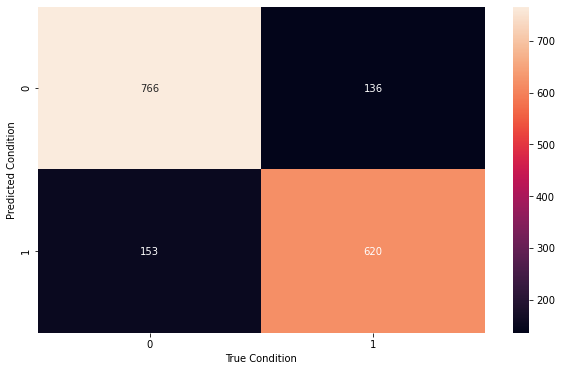

Accuracy of the Model:82.75
Precision of the Model:0.82
Recall of the Model:0.80
F1_Score of the Model:0.81
Area under the curve is  : 0.89
Number of Misclassified samples:289


In [238]:
display(YP_test,predictions_rf_PCA,predprob_rf_PCA,"Random Forest with PCA")

#### HyperTuning  Random Forest with PCA

In [239]:
grid_rfc.fit(XP_train, YP_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [10, 20, 50]})

In [240]:
grid_rfc.best_params_

{'bootstrap': 'True',
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [241]:
rfc2=RandomForestClassifier(random_state=42, bootstrap=True, criterion= 'entropy',max_depth= 20,
                            min_samples_leaf= 3,min_samples_split= 2,n_estimators= 50)

In [242]:
rfc2.fit(XP_train, YP_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       n_estimators=50, random_state=42)

In [243]:
Y_preds_random_grids_PCA=rfc2.predict(XP_test)
Y_pprob_random_grids_PCA=rfc2.predict_proba(XP_test)

Model:Random Forest using PCA with Hypertuned Parameters


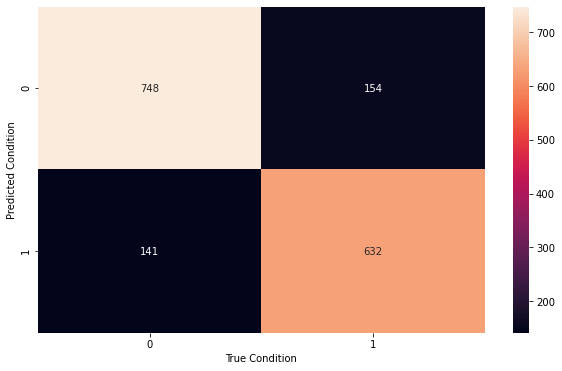

Accuracy of the Model:82.39
Precision of the Model:0.80
Recall of the Model:0.82
F1_Score of the Model:0.81
Area under the curve is  : 0.90
Number of Misclassified samples:295


In [244]:
display(YP_test,Y_preds_random_grids_PCA,Y_pprob_random_grids_PCA,"Random Forest using PCA with Hypertuned Parameters")

### SVC Model 

In [248]:
svc_classifier = SVC(C=10, probability=True,random_state=0)
svc_classifier.fit(X_train, Y_train)

Y_pred_SVC = svc_classifier.predict(X_test)

In [249]:
Y_pprob_SVC = svc_classifier.predict_proba(X_test)

Model:SVC Classifier Model


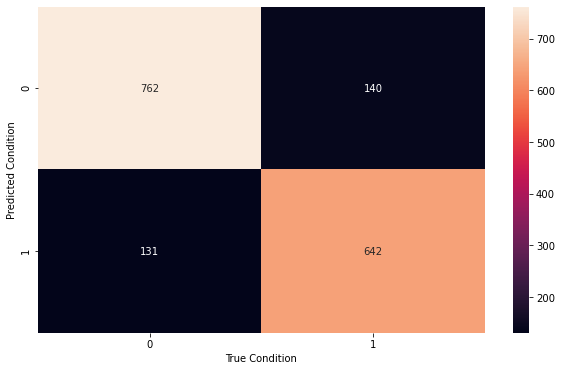

Accuracy of the Model:83.82
Precision of the Model:0.82
Recall of the Model:0.83
F1_Score of the Model:0.83
Area under the curve is  : 0.90
Number of Misclassified samples:271


In [250]:
display(Y_test,Y_pred_SVC,Y_pprob_SVC,"SVC Classifier Model")

### Hyper parameter Tuning  SVM Model

In [253]:
param_grid_svc = { "C": [1e-3, 1e-2, 1e-1, 1, 10],
             'kernel':['linear','rbf','poly'],
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001]} 
grid_search_svc = GridSearchCV(SVC(random_state=0),
                           param_grid_svc, cv=5)
grid_search_svc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [254]:
grid_search_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [255]:
#building the model from the hyperparameters
svc_classifier_grid = SVC(C= 1, gamma= 0.1,kernel='rbf',probability=True, random_state=0)
svc_classifier_grid.fit(X_train, Y_train)

Y_pred_SVC_Grid = svc_classifier_grid.predict(X_test)
Y_pprob_SVC_Grid = svc_classifier_grid.predict_proba(X_test)

Model:SVC with Hyper Tuning Parameter:


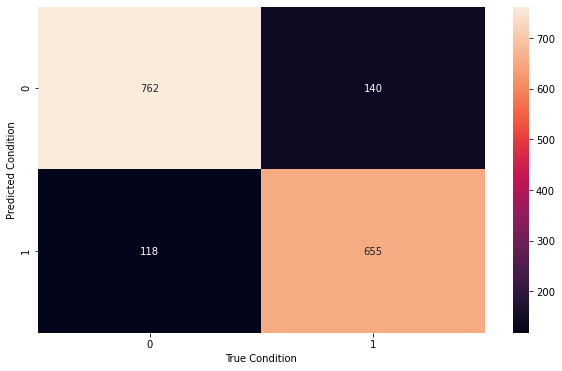

Accuracy of the Model:84.60
Precision of the Model:0.82
Recall of the Model:0.85
F1_Score of the Model:0.84
Area under the curve is  : 0.91
Number of Misclassified samples:258


In [256]:
display(Y_test,Y_pred_SVC_Grid,Y_pprob_SVC_Grid ,"SVC with Hyper Tuning Parameter:")

### SVC with PCA

In [257]:
svc_classifier_PCA = SVC(C=10, probability=True,random_state=0)
svc_classifier_PCA.fit(XP_train, YP_train)

Y_pred_SVC_PCA = svc_classifier_PCA.predict(XP_test)
Y_pprob_SVC_PCA = svc_classifier_PCA.predict_proba(XP_test)

Model:SVC Classifier Model


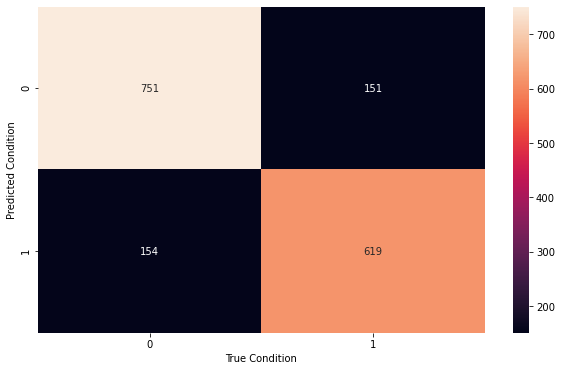

Accuracy of the Model:81.79
Precision of the Model:0.80
Recall of the Model:0.80
F1_Score of the Model:0.80
Area under the curve is  : 0.89
Number of Misclassified samples:305


In [258]:
display(Y_test,Y_pred_SVC_PCA,Y_pprob_SVC_PCA,"SVC Classifier Model")

##### Hyper Tuning SVC with PCA

In [259]:
grid_search_svc.fit(XP_train, YP_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [260]:
grid_search_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [261]:
#building the mdel from the C value
svc_classifier_grid_PCA = SVC(C= 1, gamma= 0.1,kernel='rbf',probability=True,random_state=0)
svc_classifier_grid_PCA .fit(XP_train, YP_train)

Y_pred_SVC_Grid_PCA = svc_classifier_grid_PCA.predict(XP_test)
Y_pprob_SVC_Grid_PCA = svc_classifier_grid_PCA.predict_proba(XP_test)

Model:SVC using PCA with Hyper Tuning Parameter:


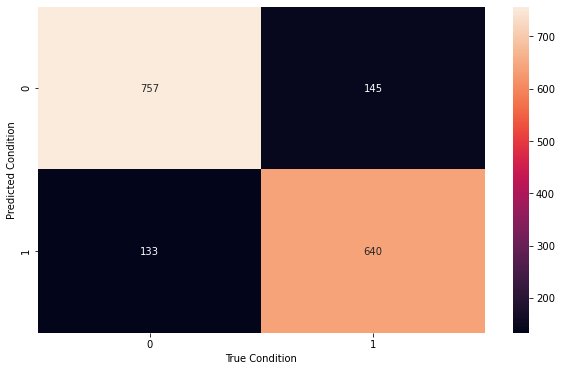

Accuracy of the Model:83.40
Precision of the Model:0.82
Recall of the Model:0.83
F1_Score of the Model:0.82
Area under the curve is  : 0.90
Number of Misclassified samples:278


In [262]:
display(YP_test,Y_pred_SVC_Grid_PCA,Y_pprob_SVC_Grid_PCA  ,"SVC using PCA with Hyper Tuning Parameter:")

## Evaluating all the Models

Model:Logistic Regression with Hyper Tuning Parameter:


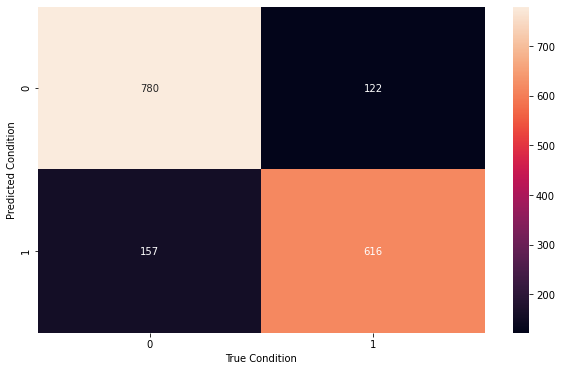

Accuracy of the Model:83.34
Precision of the Model:0.83
Recall of the Model:0.80
F1_Score of the Model:0.82
Area under the curve is  : 0.90
Number of Misclassified samples:279


In [263]:
display(Y_test,Y_pred_LogisticRegr_Grid,Y_pprob_LogisticRegr_Grid ,"Logistic Regression with Hyper Tuning Parameter:")

Model:Logistic Regression using PCA with Hyper Tuning Parameter:


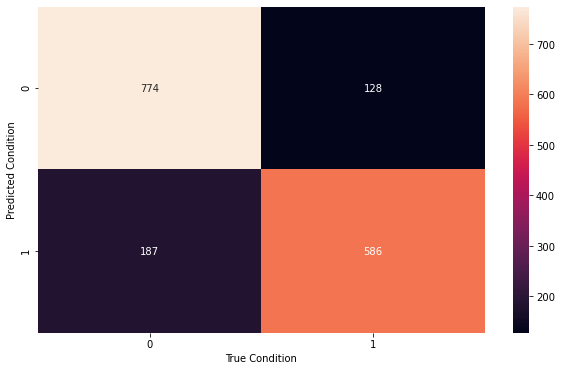

Accuracy of the Model:81.19
Precision of the Model:0.82
Recall of the Model:0.76
F1_Score of the Model:0.79
Area under the curve is  : 0.89
Number of Misclassified samples:315


In [264]:
display(YP_test,Y_pred_LogisticRegr_PCA_Grid,Y_prob_LogisticRegr_PCA_Grid ,"Logistic Regression using PCA with Hyper Tuning Parameter:")

Model:KNN at k=11 after Hypertuning the parameters:


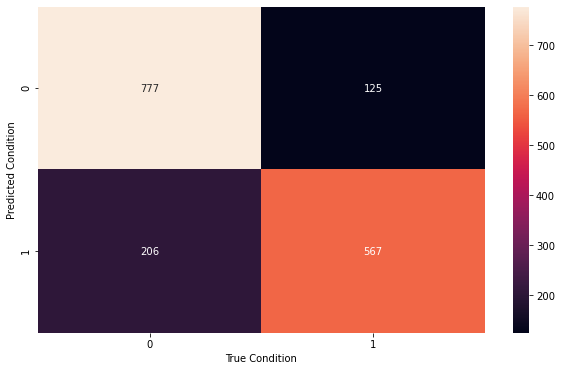

Accuracy of the Model:80.24
Precision of the Model:0.82
Recall of the Model:0.73
F1_Score of the Model:0.77
Area under the curve is  : 0.89
Number of Misclassified samples:331


In [265]:
display(Y_test,Y_preds_KNN_grids,Y_pprob_KNN_grids,"KNN at k=11 after Hypertuning the parameters:")

Model:KNN using PCA at k=23 after Hypertuning the parameters:


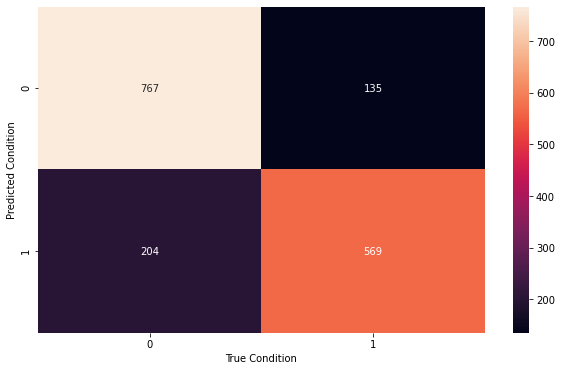

Accuracy of the Model:79.76
Precision of the Model:0.81
Recall of the Model:0.74
F1_Score of the Model:0.77
Area under the curve is  : 0.89
Number of Misclassified samples:339


In [266]:
display(YP_test,Y_preds_KNN_grids_PCA,Y_pprob_KNN_grids_PCA,"KNN using PCA at k=23 after Hypertuning the parameters:")

Model:Decision Tree with HyperTuning Parameters


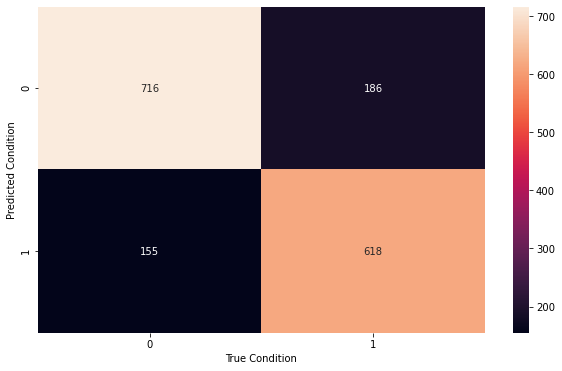

Accuracy of the Model:79.64
Precision of the Model:0.77
Recall of the Model:0.80
F1_Score of the Model:0.78
Area under the curve is  : 0.87
Number of Misclassified samples:341


In [267]:
display(Y_test,Y_preds_decision_grids,Y_pprob_decision_grids,"Decision Tree with HyperTuning Parameters")

Model:Decision tree using PCA with Hypertuned Parameters


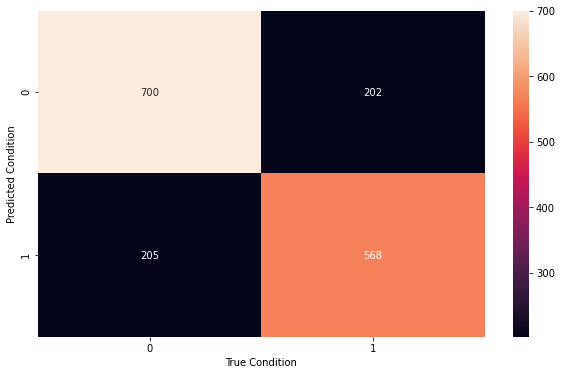

Accuracy of the Model:75.70
Precision of the Model:0.74
Recall of the Model:0.73
F1_Score of the Model:0.74
Area under the curve is  : 0.79
Number of Misclassified samples:407


In [268]:
display(YP_test,Y_preds_decision_grids_PCA,Y_pprob_decision_grids_PCA,"Decision tree using PCA with Hypertuned Parameters")

Model:Random Forest with Hypertuned Parameters


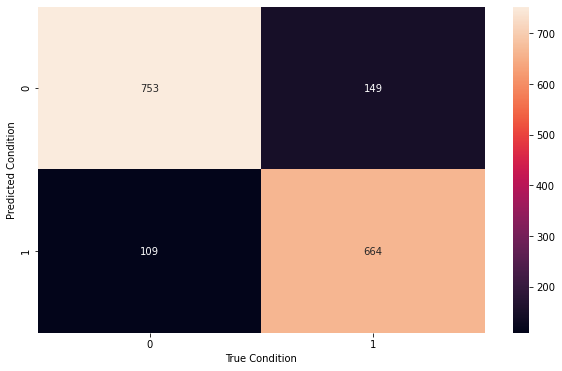

Accuracy of the Model:84.60
Precision of the Model:0.82
Recall of the Model:0.86
F1_Score of the Model:0.84
Area under the curve is  : 0.91
Number of Misclassified samples:258


In [269]:
display(Y_test,Y_preds_random_grids,Y_pprob_random_grids,"Random Forest with Hypertuned Parameters")

Model:Random Forest using PCA with Hypertuned Parameters


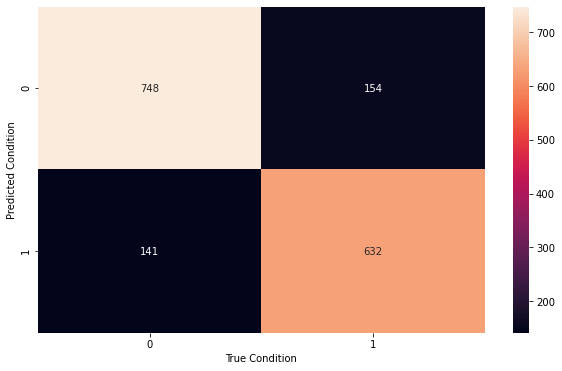

Accuracy of the Model:82.39
Precision of the Model:0.80
Recall of the Model:0.82
F1_Score of the Model:0.81
Area under the curve is  : 0.90
Number of Misclassified samples:295


In [270]:
display(YP_test,Y_preds_random_grids_PCA,Y_pprob_random_grids_PCA,"Random Forest using PCA with Hypertuned Parameters")

Model:SVC with Hyper Tuning Parameter:


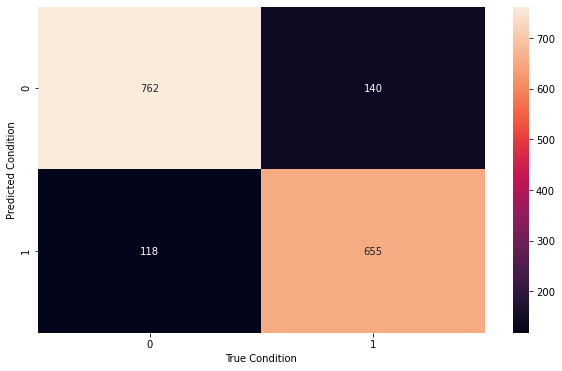

Accuracy of the Model:84.60
Precision of the Model:0.82
Recall of the Model:0.85
F1_Score of the Model:0.84
Area under the curve is  : 0.91
Number of Misclassified samples:258


In [271]:
display(Y_test,Y_pred_SVC_Grid,Y_pprob_SVC_Grid ,"SVC with Hyper Tuning Parameter:")

Model:SVC using PCA with Hyper Tuning Parameter:


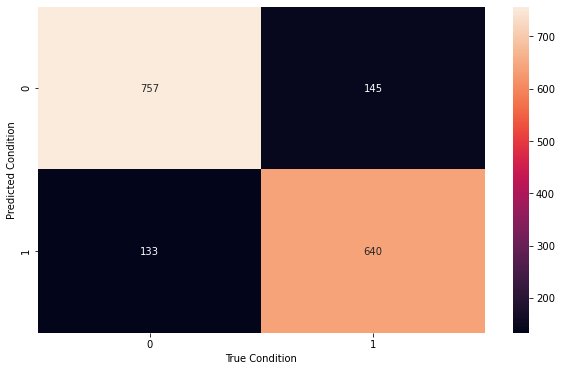

Accuracy of the Model:83.40
Precision of the Model:0.82
Recall of the Model:0.83
F1_Score of the Model:0.82
Area under the curve is  : 0.90
Number of Misclassified samples:278


In [272]:
display(YP_test,Y_pred_SVC_Grid_PCA,Y_pprob_SVC_Grid_PCA  ,"SVC using PCA with Hyper Tuning Parameter:")

In [277]:
acc1=accuracy_score(Y_test,Y_pred_LogisticRegr_Grid)
acc2=accuracy_score(YP_test,Y_pred_LogisticRegr_PCA_Grid)
acc3=accuracy_score(Y_test,Y_preds_KNN_grids)
acc4=accuracy_score(YP_test,Y_preds_KNN_grids_PCA)
acc5=accuracy_score(Y_test,Y_preds_decision_grids)
acc6=accuracy_score(YP_test,Y_preds_decision_grids_PCA)
acc7=accuracy_score(Y_test,Y_preds_random_grids)
acc8=accuracy_score(YP_test,Y_preds_random_grids_PCA)
acc9=accuracy_score(Y_test,Y_pred_SVC_Grid)
acc10=accuracy_score(YP_test,Y_pred_SVC_Grid_PCA)

In [279]:
auc1=roc_auc_score(Y_test,Y_pprob_LogisticRegr_Grid[:,1])
auc2=roc_auc_score(YP_test,Y_prob_LogisticRegr_PCA_Grid[:,1])
auc3=roc_auc_score(Y_test,Y_pprob_KNN_grids[:,1])
auc4=roc_auc_score(YP_test,Y_pprob_KNN_grids_PCA[:,1])
auc5=roc_auc_score(Y_test,Y_pprob_decision_grids[:,1])
auc6=roc_auc_score(YP_test,Y_pprob_decision_grids_PCA[:,1])
auc7=roc_auc_score(Y_test,Y_pprob_random_grids[:,1])
auc8=roc_auc_score(YP_test,Y_pprob_random_grids_PCA[:,1])
auc9=roc_auc_score(Y_test,Y_pprob_SVC_Grid[:,1])
auc10=roc_auc_score(YP_test,Y_pprob_SVC_Grid_PCA[:,1])

In [280]:
Model=["LR-Base","LR-PCA","KNN-Base","KNN-PCA", "DT-Base","DT-PCA","RF-Base", "RF-PCA","SVC-Base","SVC-PCA"]
accuracy=[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10]
AUC=[auc1,auc2,auc3,auc4,auc5,auc6,auc7,auc8,auc9,auc10]

In [294]:
df_accuracy=pd.DataFrame([Model,accuracy,AUC]).transpose()
df_accuracy.columns=['Model','Accuracy','AUC']
print(df_accuracy)

      Model  Accuracy       AUC
0   LR-Base  0.833433  0.903886
1    LR-PCA   0.81194  0.885333
2  KNN-Base  0.802388  0.890557
3   KNN-PCA  0.797612  0.885989
4   DT-Base  0.796418  0.869788
5    DT-PCA  0.757015  0.791923
6   RF-Base   0.84597    0.9147
7    RF-PCA  0.823881  0.895453
8  SVC-Base   0.84597  0.911284
9   SVC-PCA   0.83403  0.901088


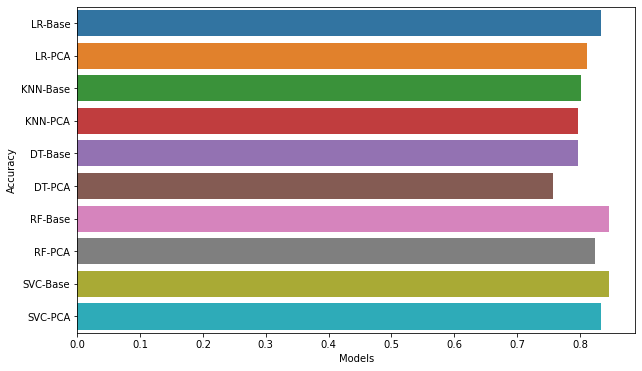

In [299]:
plt.figure(figsize=(10,6))
sns.barplot(y='Model',x='Accuracy',data=df_accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

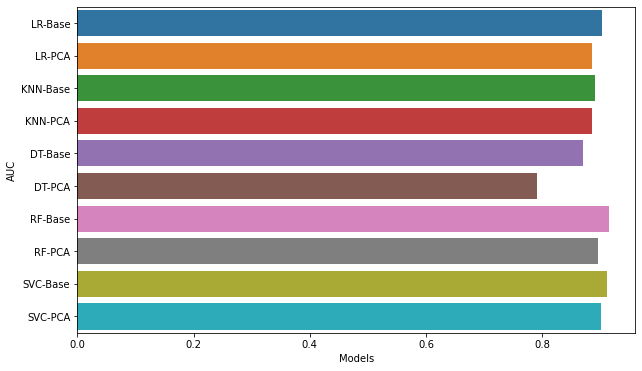

In [300]:
plt.figure(figsize=(10,6))
sns.barplot(y='Model',x='AUC',data=df_accuracy)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.show()

##### After implementing all the models, found the Random Forest Full Model after Hypertunning and SVM Full Model after Hypertunning gave the best results.

#### Recommendation:

1. People pefer investing in deposit before 15th of the every month more. So, more customers should be contacted between 1-15th of every month.
2. Many Customers who spoke for more duration during the calls prefer to invest in deposit. So, the marketing team should try to talk to the Customers for longer duration and inform about the schemes.
3. Old age people prefer more deposit so the marketing team should focus more on Senior Citizen age group.
4. The Markting team should focus more on retired persons and students compared to service, technicians  and blue-collar
5. Similarly, Customers with Single Status shuld be foucued more for Term Deposit.
6. Customers with tertiary education should be focused more than secondary education.
7. People with no Housing Laons, Personnal Loan or No Default payement should be contacted more for the Campaign.
8. Customers Should be contacted more on cellular as a direct contact can be made with them rather than telephonic contacts
9. Similarly focus should be to contact customers in the Financial year end like month of March or mid financial year like September/ October as customers investing more during these months.